In [1]:
"""
The below code is an analysis of World Bank data for the region of Central Asia,
which include 13 countries.

Apart from main dataset, provided to us, we used some external variables from 
World Bank. This means the code only runs, if appropriete files are in user's
directory.

"""


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Creating DataFrame from all WB data
all_data = 'WDIW.xlsx'
world_bank = pd.read_excel(all_data)

# Taking out only Central Asia dat
Dinobots_1 = world_bank [world_bank['Cool Name'] == 'Dinobots']

Dinobots_1.to_excel('Central_Asia.xlsx', index=False)
Dinobots = Dinobots_1.set_index('Country Code', drop = False)
Dinobots = Dinobots.drop('Country Code', axis = 1)

Dinobots['GDP (current bnUS$)'] = Dinobots.loc[:,'GDP (current US$)']/1000000000
Dinobots['GDP (current bnUS$)'] = Dinobots['GDP (current bnUS$)'].round(2)
Dinobots['GDP per capita US$']  = Dinobots['GDP (current US$)']/Dinobots['Population, total']


In [2]:
# Creating the column for GDP per capita
Dinobots['GDP per capita US$'] = Dinobots['GDP per capita US$'].round(2) 
Dinobots['GDP per capita US$']
Dinobots


,Country Name,Counter,Hult Region,Cool Name,Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)","Adolescent fertility rate (births per 1,000 women ages 15-19)",Age dependency ratio (% of working-age population),"Age dependency ratio, old (% of working-age population)",...,Prevalence of undernourishment (% of population),"Prevalence of underweight, weight for age (% of children under 5)",Rural population (% of total population),"Services, value added (% of GDP)",Surface area (sq. km),Tax revenue (% of GDP),Urban population (% of total population),Urban population growth (annual %),GDP (current bnUS$),GDP per capita US$
Country Code,,,,,,,,,,,,,,,,,,,,,
BGD,Bangladesh,13,Central Asia,Dinobots,88.000000,81.280508,99.500000,82.962,50.091697,7.728934,...,14.7,NaN,64.142,53.476211,1.476300e+05,NaN,35.858,3.255244,249.72,1563.99
BTN,Bhutan,13,Central Asia,Dinobots,97.700000,96.760153,99.100000,20.184,47.371469,8.731593,...,NaN,NaN,59.833,37.152890,3.839400e+04,12.030195,40.167,3.052062,2.53,3390.71
CHN,China,13,Central Asia,Dinobots,100.000000,99.972634,100.000000,7.635,39.435946,14.424817,...,8.6,NaN,42.040,51.892765,9.562910e+06,NaN,57.960,2.693540,12143.49,8759.04
IND,India,13,Central Asia,Dinobots,92.618660,89.306555,99.206802,13.177,50.289637,8.991999,...,14.5,NaN,66.400,48.451018,3.287259e+06,11.182079,33.600,2.314448,2652.55,1981.50
KAZ,Kazakhstan,13,Central Asia,Dinobots,100.000000,100.000000,100.000000,29.750,53.968577,10.988464,...,2.5,NaN,42.664,57.424244,2.724902e+06,10.550894,57.336,1.486030,162.89,9030.32
KGZ,Kyrgyzstan,13,Central Asia,Dinobots,100.000000,100.000000,100.000000,32.763,57.712510,6.959558,...,7.1,NaN,63.865,49.932447,1.999500e+05,17.046285,36.135,2.463664,7.70,1242.77
MDV,Maldives,13,Central Asia,Dinobots,99.800000,99.864962,99.700000,7.810,31.879757,4.982931,...,10.3,NaN,60.620,67.369350,3.000000e+02,NaN,39.380,5.386972,4.87,9801.62
MNG,Mongolia,13,Central Asia,Dinobots,85.869652,55.735523,99.815102,30.993,51.385808,6.046090,...,13.4,NaN,31.637,42.279852,1.564120e+06,13.602846,68.363,1.957855,11.43,3671.95
MMR,Myanmar,13,Central Asia,Dinobots,69.814837,59.919135,92.554521,28.509,47.945958,8.227360,...,10.6,NaN,69.678,40.370732,6.765900e+05,6.017069,30.322,1.428614,66.72,1249.83


In [3]:
# Creating a data frame only for economic variables
Dinobots_economy = Dinobots[['Country Name','GDP (current bnUS$)','GDP growth (annual %)','GDP per capita US$','Services, value added (% of GDP)','Employment in agriculture (% of total employment) (modeled ILO estimate)','Employment in industry (% of total employment) (modeled ILO estimate)','Employment in services (% of total employment) (modeled ILO estimate)']]
Dinobots_economy['total'] = Dinobots['Employment in agriculture (% of total employment) (modeled ILO estimate)']+Dinobots['Employment in industry (% of total employment) (modeled ILO estimate)']+ Dinobots['Employment in services (% of total employment) (modeled ILO estimate)']

C:\Users\dmows\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


C:\Users\dmows\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


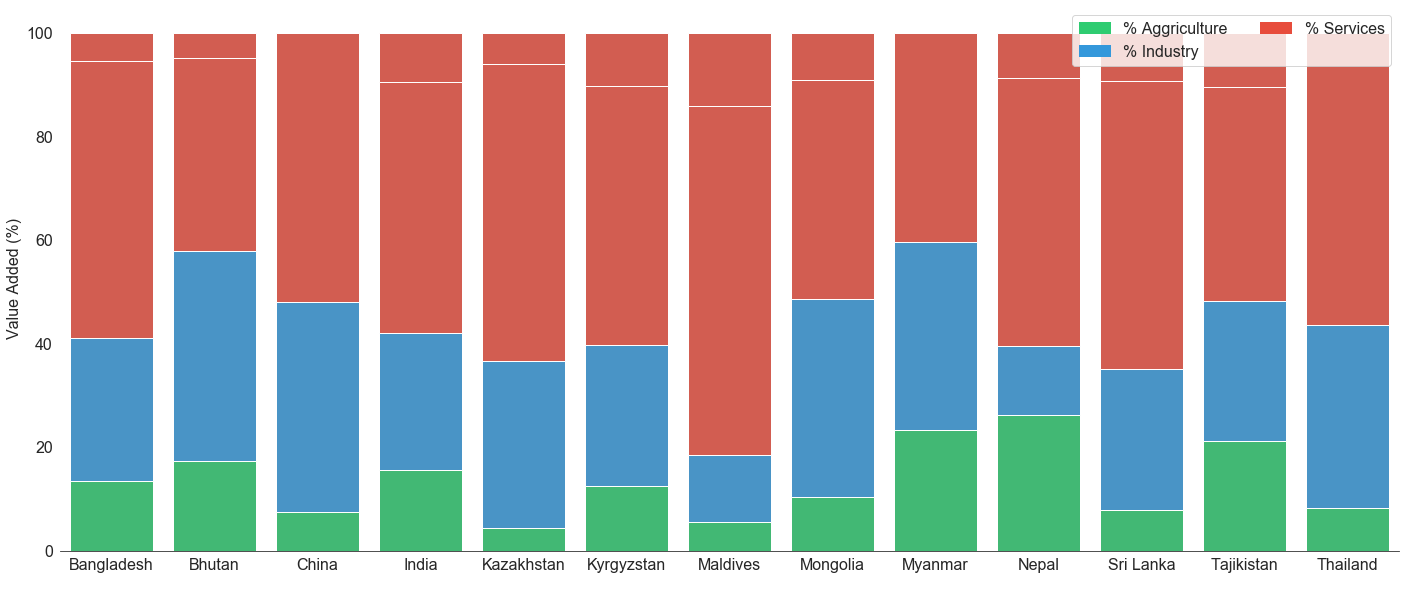

In [4]:
# Comparing distributions of GDP sectors per country
Dinobots_economy['total'] = Dinobots['Employment in agriculture (% of total employment) (modeled ILO estimate)']+Dinobots['Employment in industry (% of total employment) (modeled ILO estimate)']+ Dinobots['Employment in services (% of total employment) (modeled ILO estimate)']

Dinobots_eco = Dinobots_economy.rename(columns =
                                      {'Country Name':'country',
                                       'Employment in agriculture (% of total employment) (modeled ILO estimate)':'agri',
                                       'Employment in industry (% of total employment) (modeled ILO estimate)':'industry',
                                       'Employment in services (% of total employment) (modeled ILO estimate)':'services'})

Dinobots_eco['agriind'] = Dinobots_eco['agri']+Dinobots_eco['industry']

#setting general plotting properties
sns.set_style("white")
sns.set_context({"figure.figsize": (24, 10)})

#creating total chart
sns.barplot(x = Dinobots_eco.country, y = Dinobots_eco.total, color = "#e74c3c")

#adding plot of aggriculture + industry parts on top
second_plot = sns.barplot(x = Dinobots_eco.country, y = Dinobots_eco.agriind, color = "#3498db")

#adding aggriculture parts on top
bottom_plot = sns.barplot(x = Dinobots_eco.country, y = Dinobots_eco.agri, color = "#2ecc71")


topbar = plt.Rectangle((0,0),1,1,fc="#e74c3c", edgecolor = 'none')
middlebar = plt.Rectangle((0,0),1,1,fc="#3498db", edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='#2ecc71',  edgecolor = 'none')
l = plt.legend([bottombar, middlebar, topbar], ['% Aggriculture', '% Industry','% Services'], loc=1, ncol = 2, prop={'size':16})


#defining axe labels
sns.despine(left=True)
bottom_plot.set_ylabel("Distribution of Jobs (%)")
bottom_plot.set_xlabel(" ")

#increasing fonts 
for item in ([bottom_plot.xaxis.label, bottom_plot.yaxis.label] +
             bottom_plot.get_xticklabels() + bottom_plot.get_yticklabels()):
    item.set_fontsize(16)


#########################################################################################################

Dinobots_valueadded = Dinobots[['Country Name', 
                                         'Agriculture, forestry, and fishing, value added (% of GDP)', 
                                         'Industry (including construction), value added (% of GDP)',
                                         'Services, value added (% of GDP)']]

Dinobots_val = Dinobots_valueadded.rename(columns =
                                      {'Country Name':'country',
                                       'Agriculture, forestry, and fishing, value added (% of GDP)': 'agric', 
                                       'Industry (including construction), value added (% of GDP)':'indust',
                                       'Services, value added (% of GDP)':'servi'})
                                       
                                       
Dinobots_val['agriindust'] = Dinobots_val['agric']+Dinobots_val['indust']
Dinobots_val['total']      = Dinobots_val['agric']+Dinobots_val['indust']+Dinobots_val['servi']

#setting general plotting properties
sns.set_style("white")
sns.set_context({"figure.figsize": (24, 10)})

#creating total chart
sns.barplot(x = Dinobots_val.country, y = Dinobots_val.total, color = "#e74c3c")

#adding plot of aggriculture + industry parts on top
second_plot = sns.barplot(x = Dinobots_val.country, y = Dinobots_val.agriindust, color = "#3498db")

#adding aggriculture parts on top
bottom_plot = sns.barplot(x = Dinobots_val.country, y = Dinobots_val.agric, color = "#2ecc71")


topbar = plt.Rectangle((0,0),1,1,fc="#e74c3c", edgecolor = 'none')
middlebar = plt.Rectangle((0,0),1,1,fc="#3498db", edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='#2ecc71',  edgecolor = 'none')
l = plt.legend([bottombar, middlebar, topbar], ['% Aggriculture', '% Industry','% Services'], loc=1, ncol = 2, prop={'size':16})


#defining axe labels
sns.despine(left=True)
bottom_plot.set_ylabel("Value Added (%)")
bottom_plot.set_xlabel(" ")

#increasing fonts 
for item in ([bottom_plot.xaxis.label, bottom_plot.yaxis.label] +
             bottom_plot.get_xticklabels() + bottom_plot.get_yticklabels()):
    item.set_fontsize(16)


C:\Users\dmows\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\dmows\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\Users\dmows\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

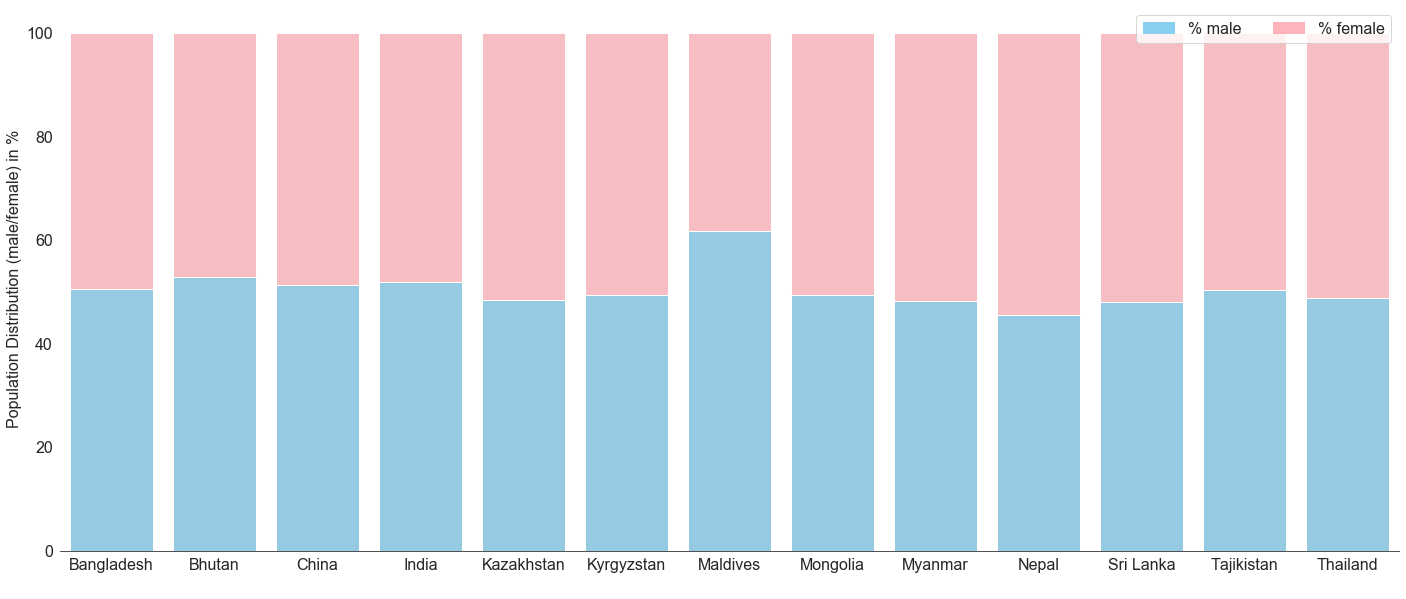

In [5]:
# Comparing male vs female population per country
Dinobots_gender = Dinobots[['Country Name',
                            'Population ages 0-14 (% of total population)',
                            'Population ages 15-64 (% of total population)',
                            'Population ages 65 and above (% of total population)',
                            'Population density (people per sq. km of land area)',
                            'Population growth (annual %)',
                            'Population in the largest city (% of urban population)',
                            'Population living in slums (% of urban population)',
                            'Population, female',
                            'Population, male',
                            'Population, total']]

Dinobots_gender['Population, female %'] = Dinobots_gender['Population, female']/Dinobots_gender['Population, total']*100
Dinobots_gender['Population, male %']   = Dinobots_gender['Population, male']/Dinobots_gender['Population, total']*100
Dinobots_gender['poptotal']             = Dinobots_gender['Population, male %'] + Dinobots_gender['Population, female %']


Dinobots_gen = Dinobots_gender.rename(columns =
                                      {'Country Name':'country',
                                       'Population, female %':'female',
                                       'Population, male %':'male',
                                       'Population, total':'total'})
                                    
                                       


#setting general plotting properties
sns.set_style("white")
sns.set_context({"figure.figsize": (24, 10)})

#creating total chart, will be female
sns.barplot(x = Dinobots_gen.country, y = Dinobots_gen.poptotal, color = "#FFB4BC")

#adding plot of male
second_plot = sns.barplot(x = Dinobots_gen.country, y = Dinobots_gen.male, color = "#89cff0")


topbar = plt.Rectangle((0,0),1,1,fc="#FFB4BC", edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='#89cff0',  edgecolor = 'none')
l = plt.legend([bottombar, topbar], ['% male', '% female'], loc=1, ncol = 2, prop={'size':16})


#defining axe labels
sns.despine(left=True)
second_plot.set_ylabel("Population Distribution (male/female) in %")
second_plot.set_xlabel(" ")

#increasing fonts 
for item in ([second_plot.xaxis.label, second_plot.yaxis.label] +
             second_plot.get_xticklabels() + second_plot.get_yticklabels()):
    item.set_fontsize(16)


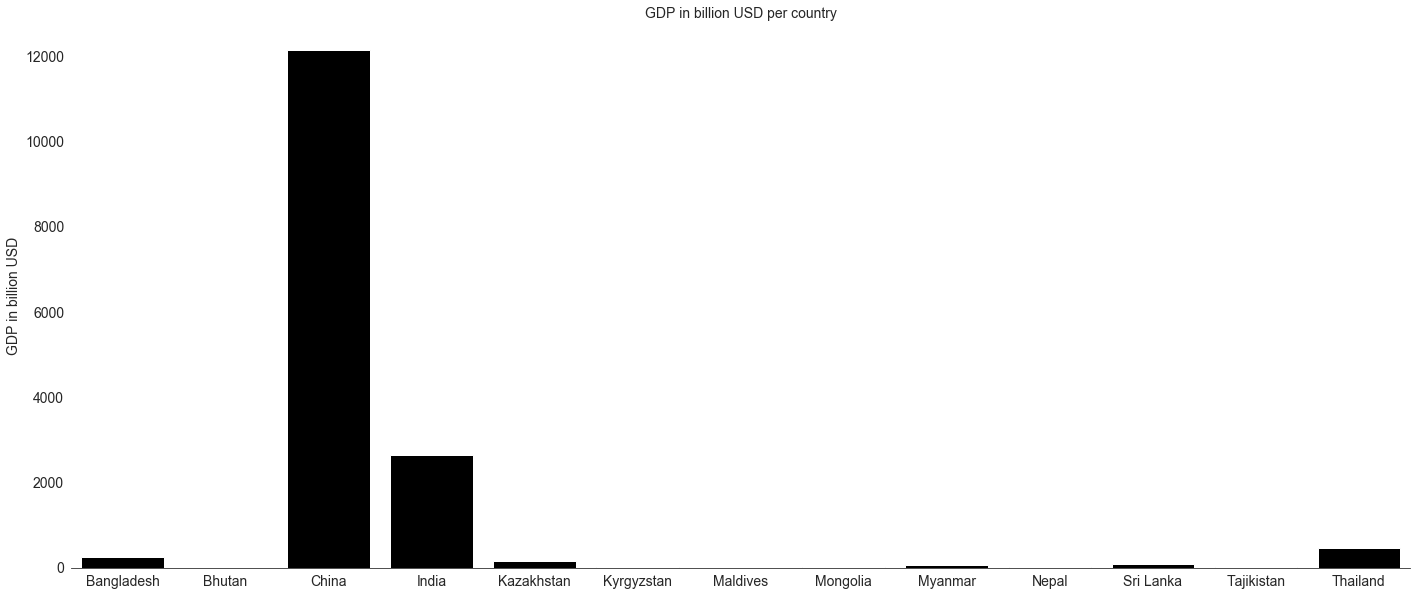

In [6]:
# Distribution of GDP
Dinobots_GDP = Dinobots_economy.rename(columns=
                                      {'Country Name':'country',
                                       'GDP (current bnUS$)': 'GDP',
                                       'GDP growth (annual %)': 'GDPgrowth',
                                       'GDP per capita US$': 'GDPcapita'})


#GDP chart for GDP
plot = sns.barplot(x = Dinobots_GDP.country, y = Dinobots_GDP.GDP, color = "Black")

#defining axe labels
sns.despine(left=True)
plot.set_ylabel("GDP in billion USD")
plot.set_xlabel(" ")
plot.set_title("GDP in billion USD per country").set_fontsize(35)


for item in ([plot.title, plot.xaxis.label, plot.yaxis.label] +
              plot.get_xticklabels() + plot.get_yticklabels()):
    item.set_fontsize(14)
    
plt.savefig("GDP all countries - graph1.png")


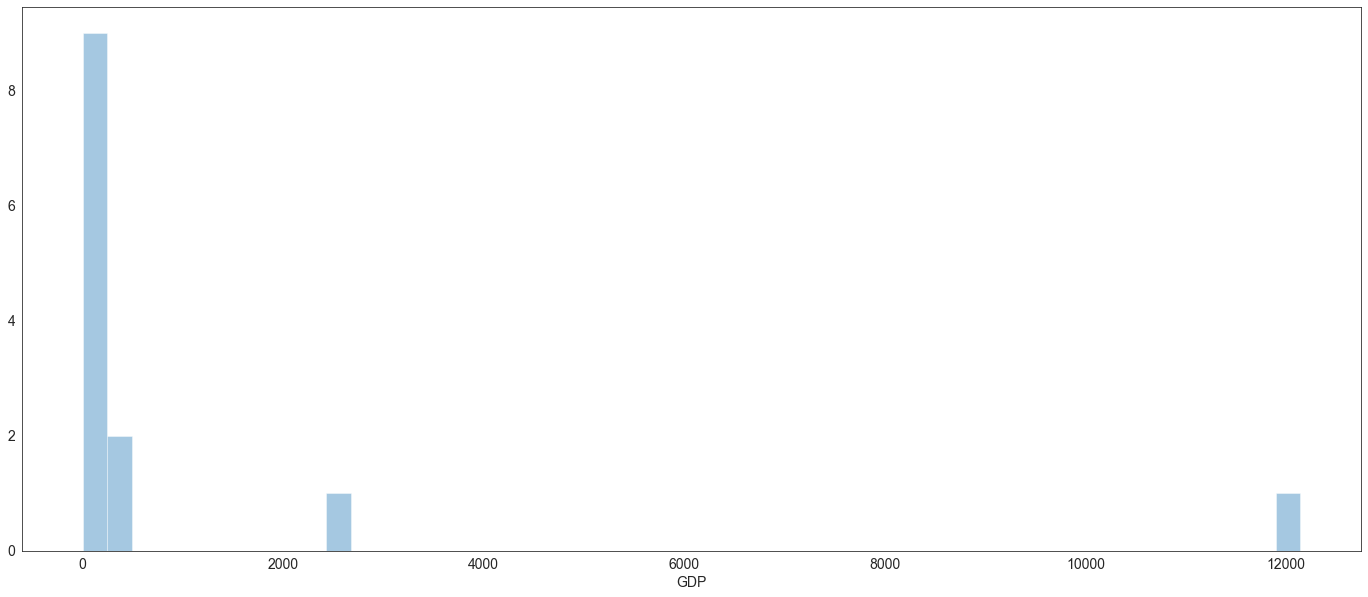

In [7]:
#Distribution of GDP - try to show better

histo_1 = Dinobots_GDP['GDP']
hi = sns.distplot(histo_1,kde=False)

for item in ([hi.title, hi.xaxis.label, hi.yaxis.label] +
              hi.get_xticklabels() + hi.get_yticklabels()):
    item.set_fontsize(14)

In [8]:
Dinobots_GDP

,country,GDP,GDPgrowth,GDPcapita,"Services, value added (% of GDP)",Employment in agriculture (% of total employment) (modeled ILO estimate),Employment in industry (% of total employment) (modeled ILO estimate),Employment in services (% of total employment) (modeled ILO estimate),total
Country Code,,,,,,,,,
BGD,Bangladesh,249.72,7.284184,1563.99,53.476211,40.597000,20.419001,38.983002,99.999002
BTN,Bhutan,2.53,4.629101,3390.71,37.152890,57.207001,9.755000,33.039001,100.001002
CHN,China,12143.49,6.757008,8759.04,51.892765,26.980000,28.979000,44.041000,100.000000
IND,India,2652.55,7.167889,1981.50,48.451018,44.521999,24.473000,31.004999,99.999998
KAZ,Kazakhstan,162.89,4.100000,9030.32,57.424244,15.131000,21.283001,63.587002,100.001002
KGZ,Kyrgyzstan,7.70,4.700000,1242.77,49.932447,26.646000,22.129000,51.224998,99.999998
MDV,Maldives,4.87,6.911694,9801.62,67.369350,9.109000,18.667000,72.224998,100.000998
MNG,Mongolia,11.43,5.301668,3671.95,42.279852,28.783001,19.219999,51.998001,100.001001
MMR,Myanmar,66.72,6.758629,1249.83,40.370732,50.583000,15.943000,33.474998,100.000998


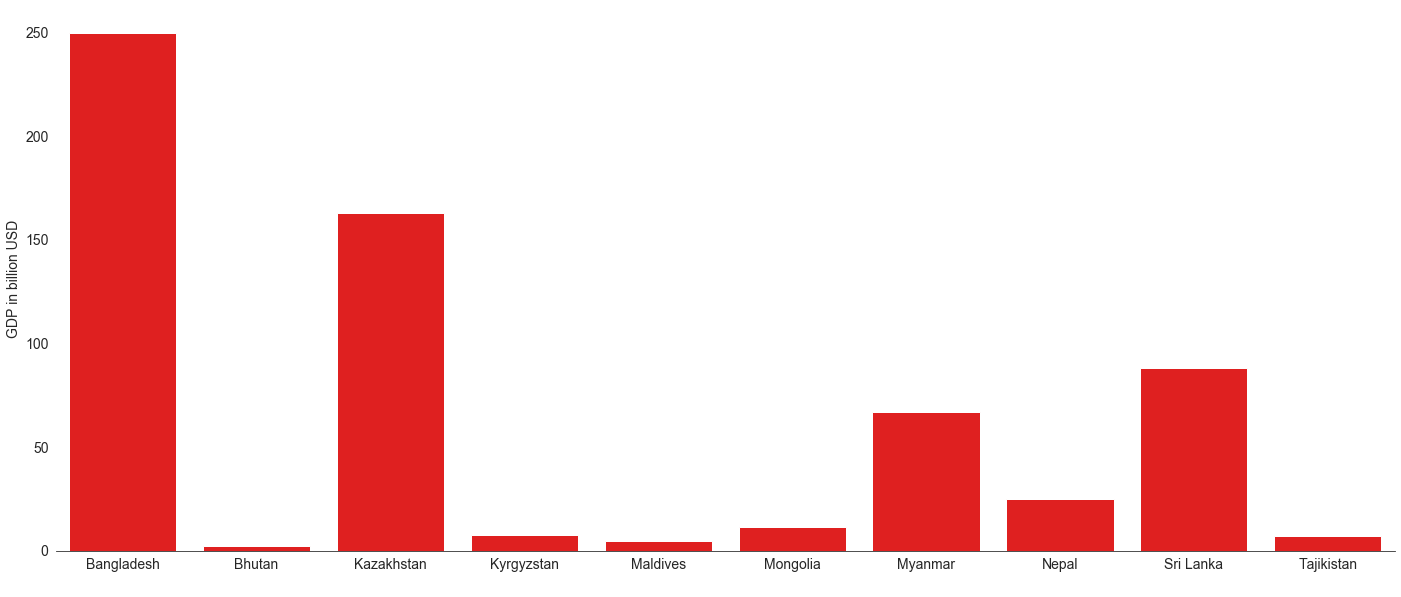

In [9]:
#Without China and India:

nochiind = Dinobots_GDP.drop(["CHN","IND","THA"], axis = 0)


#creating 
plot = sns.barplot(x = nochiind.country, y = nochiind.GDP, color = "red")

#defining axe labels
sns.despine(left=True)
plot.set_ylabel("GDP in billion USD")
plot.set_xlabel(" ")

for item in ([plot.title, plot.xaxis.label, plot.yaxis.label] +
              plot.get_xticklabels() + plot.get_yticklabels()):
    item.set_fontsize(14)
    

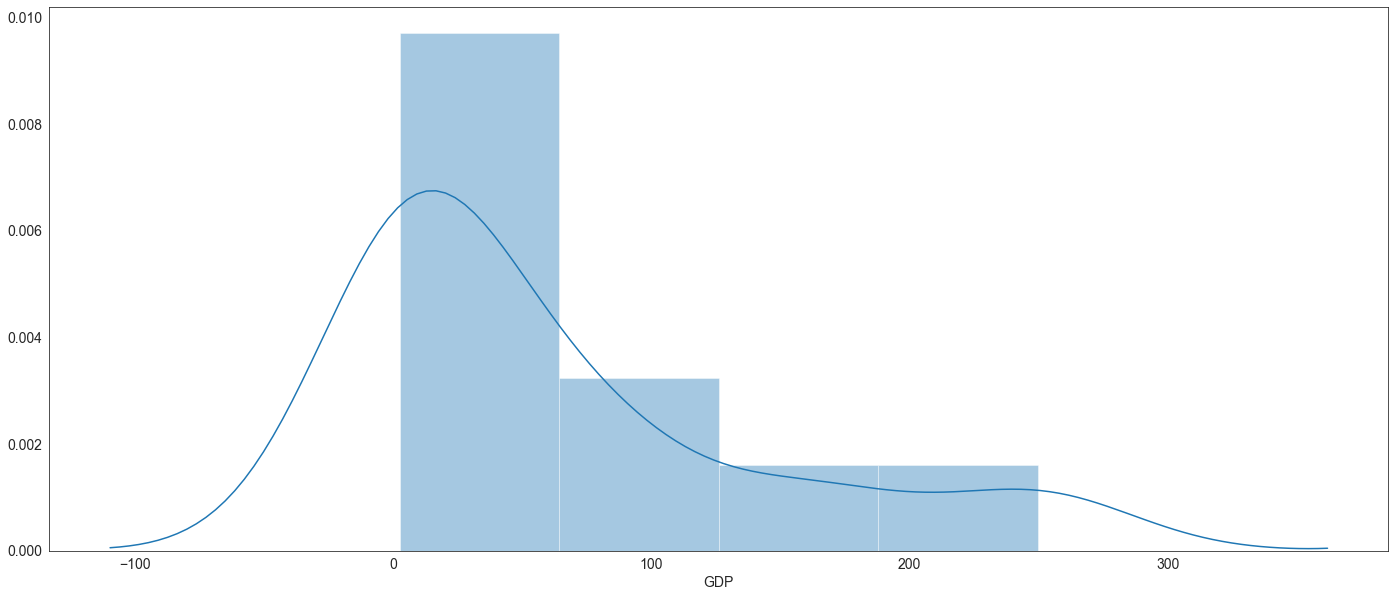

In [10]:
#distribution of GDP without China, India and Thailand
histo = nochiind['GDP']
hi_1 = sns.distplot(histo)

for item in ([hi_1.title, hi_1.xaxis.label, hi_1.yaxis.label] +
              hi_1.get_xticklabels() + hi_1.get_yticklabels()):
    item.set_fontsize(14)

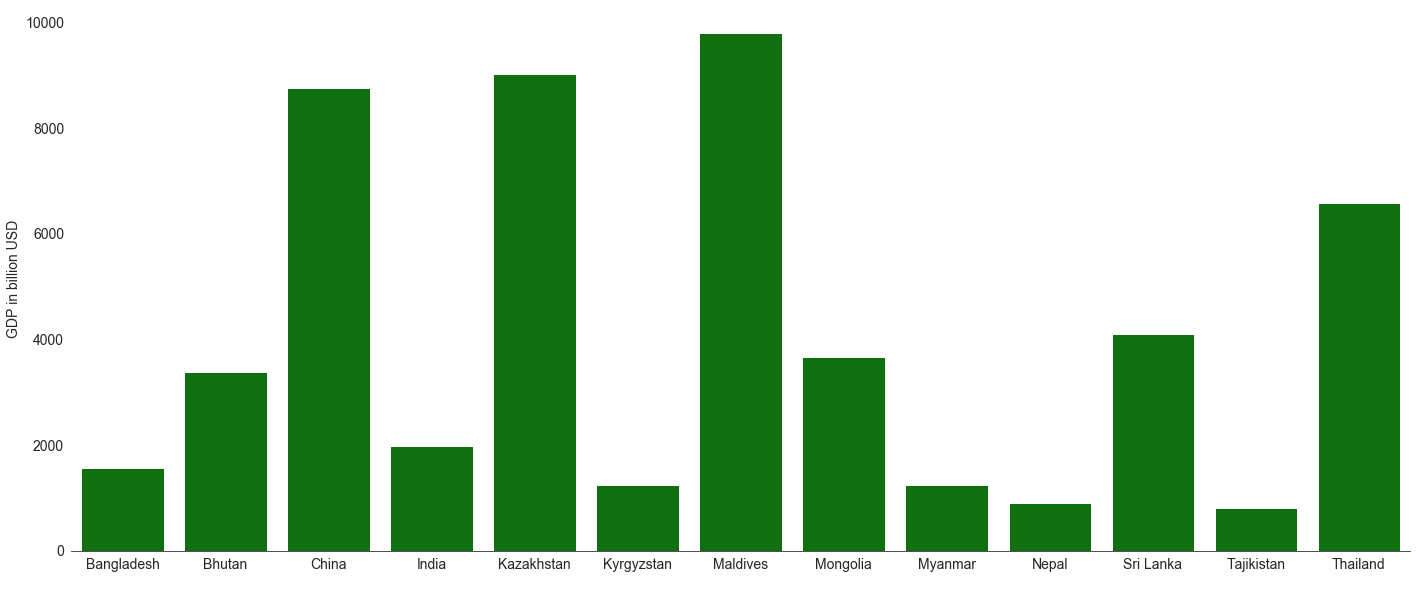

In [11]:
#distribution of GDP without China, India and Thailand with barplot

plot = sns.barplot(x = Dinobots_GDP.country, y = Dinobots_GDP.GDPcapita, color = "green")


#defining axe labels
sns.despine(left=True)
plot.set_ylabel("GDP in billion USD")
plot.set_xlabel(" ")


for item in ([plot.title, plot.xaxis.label, plot.yaxis.label] +
              plot.get_xticklabels() + plot.get_yticklabels()):
    item.set_fontsize(14)
    

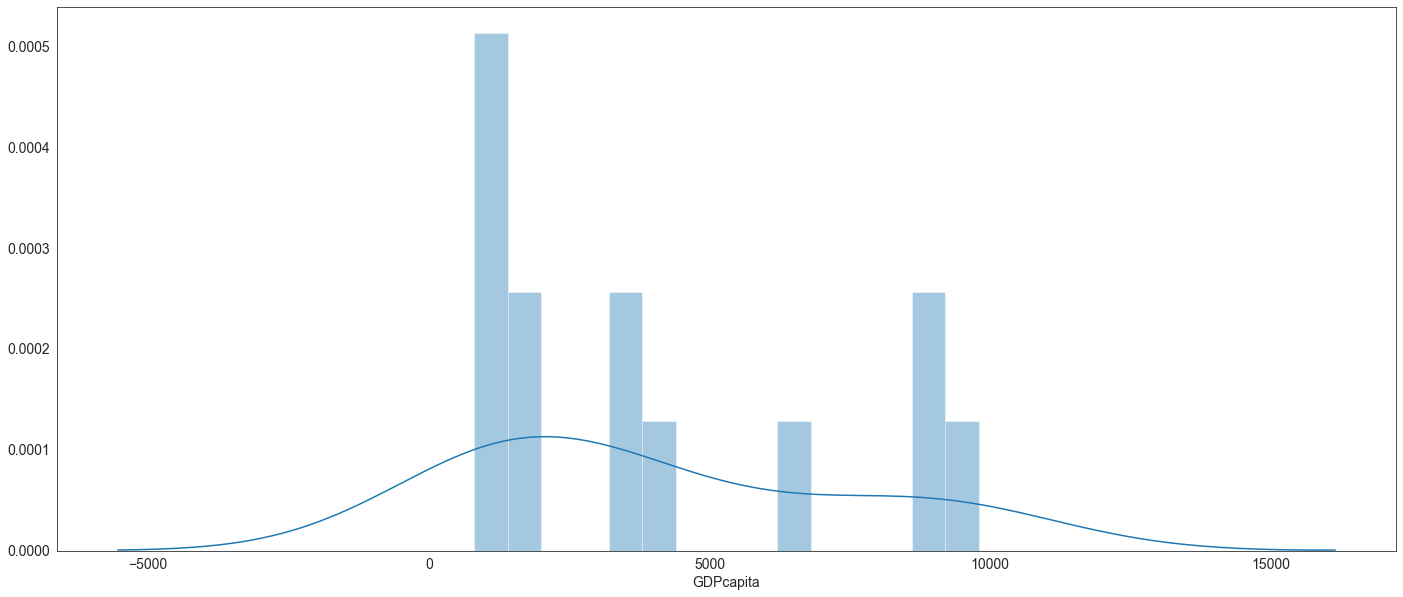

In [12]:
#distribution of GDP per capita

hist_2 = Dinobots_GDP['GDPcapita']
hi_2 = sns.distplot(hist_2, bins=15)

for item in ([hi_2.title, hi_2.xaxis.label, hi_2.yaxis.label] +
              hi_2.get_xticklabels() + hi_2.get_yticklabels()):
    item.set_fontsize(14)

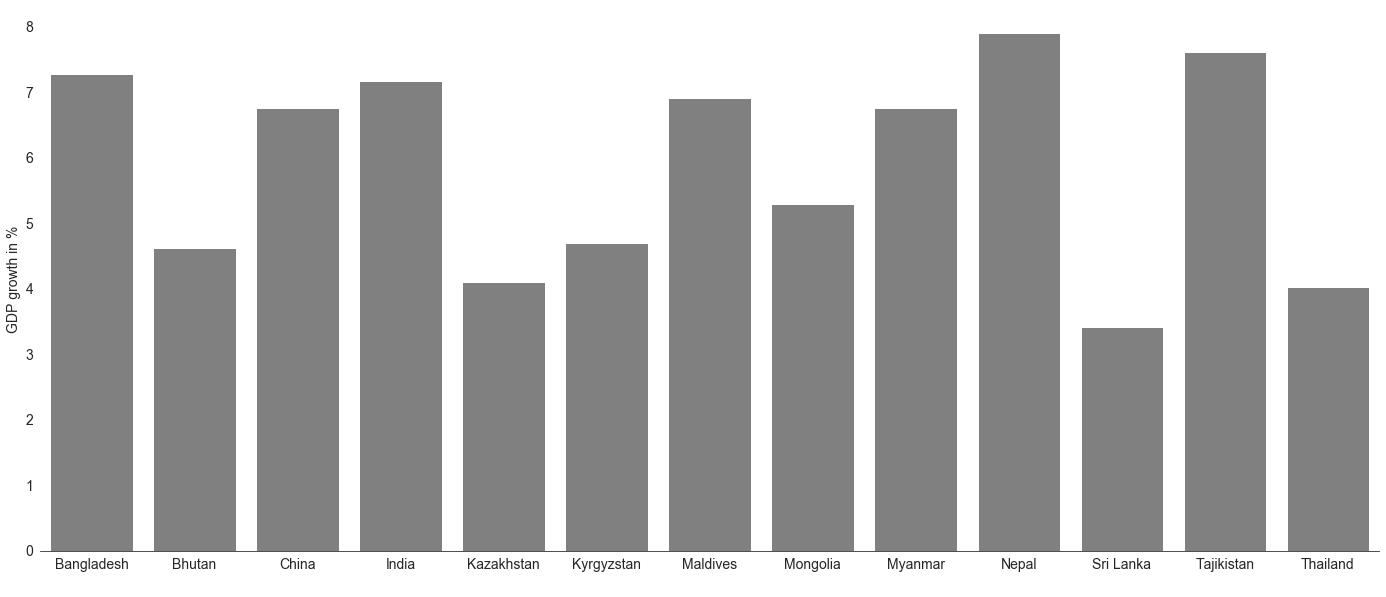

In [13]:
# GDP growth per country

plot = sns.barplot(x = Dinobots_GDP.country, y = Dinobots_GDP.GDPgrowth, color = "gray")

#defining axe labels
sns.despine(left=True)
plot.set_ylabel("GDP growth in %")
plot.set_xlabel(" ")


for item in ([plot.title, plot.xaxis.label, plot.yaxis.label] +
              plot.get_xticklabels() + plot.get_yticklabels()):
    item.set_fontsize(14)

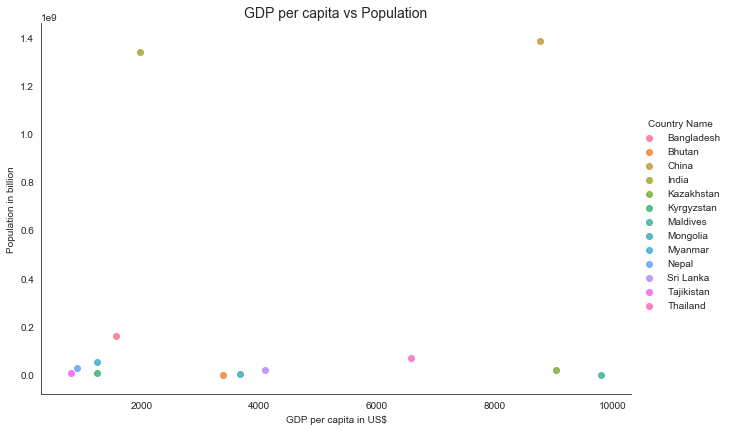

In [14]:
# Lmplot GDP per capita
ax = sns.lmplot('GDP per capita US$',
           'Population, total', 
           data = Dinobots, 
           fit_reg=False,
           hue = 'Country Name',
           height=6, 
           aspect=1.5)

plt.title("GDP per capita vs Population", fontsize = 14)
ax.set(xlabel='GDP per capita in US$', ylabel='Population in billion')

plt.savefig("GDP per capita vs Population.png")

In [15]:
#dividing the data into different groups to perfom more reasonable analyses
LowGDP  = Dinobots.drop(["BGD", "KAZ", "MMR", "LKA", "CHN", "IND", "THA"], axis = 0)

MidGDP  = Dinobots.drop(["CHN", "IND", "THA", "BTN", "KGZ", "MDV", "MNG", "NPL", "TJK"], axis = 0)

HighGDP = Dinobots.drop(["BGD", "KAZ", "MMR", "LKA", "BTN", "KGZ", "MDV", "MNG", "NPL", "TJK"], axis = 0)

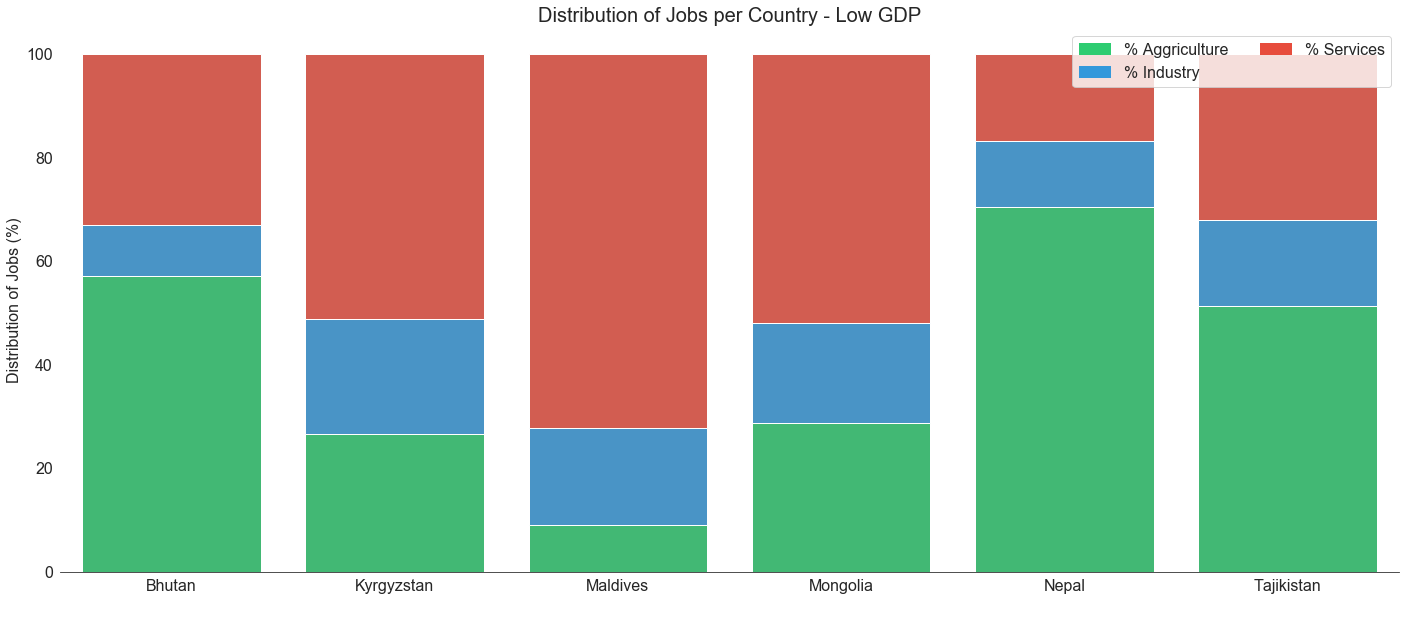

In [16]:
#Industry distribution for the low GDP group

LowSectors = LowGDP.rename(columns =
                                      {'Country Name':'country',
                                       'Employment in agriculture (% of total employment) (modeled ILO estimate)':'agri',
                                       'Employment in industry (% of total employment) (modeled ILO estimate)':'industry',
                                       'Employment in services (% of total employment) (modeled ILO estimate)':'services',
                                       'GDP (current US$)': 'GDP',
                                       'GDP growth (annual %)': 'GDPgrowth'})

LowSectors['total'] = LowSectors['agri'] + LowSectors['industry'] + LowSectors['services']

LowSectors['agriind'] = LowSectors['agri']+LowSectors['industry']

#setting general plotting properties
sns.set_style("white")
sns.set_context({"figure.figsize": (24, 10)})

#creating total chart
sns.barplot(x = LowSectors.country, y = LowSectors.total, color = "#e74c3c")

#adding plot of aggriculture + industry parts on top
second_plot = sns.barplot(x = LowSectors.country, y = LowSectors.agriind, color = "#3498db")

#adding aggriculture parts on top
bottom_plot = sns.barplot(x = LowSectors.country, y = LowSectors.agri, color = "#2ecc71")


topbar = plt.Rectangle((0,0),1,1,fc="#e74c3c", edgecolor = 'none')
middlebar = plt.Rectangle((0,0),1,1,fc="#3498db", edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='#2ecc71',  edgecolor = 'none')
l = plt.legend([bottombar, middlebar, topbar], ['% Aggriculture', '% Industry','% Services'], loc=1, ncol = 2, prop={'size':16})


#defining axe labels
sns.despine(left=True)
bottom_plot.set_ylabel("Distribution of Jobs (%)")
bottom_plot.set_xlabel(" ")
bottom_plot.set_title('Distribution of Jobs per Country - Low GDP').set_fontsize(20)


#increasing fonts 
for item in ([bottom_plot.xaxis.label, bottom_plot.yaxis.label] +
             bottom_plot.get_xticklabels() + bottom_plot.get_yticklabels()):
    item.set_fontsize(16)
    
plt.savefig("Distribution of Jobs per Country - Low GDP - graph5.png")   
    
#finding: Usually, low GDP countries have a relatively high share of agriculture jobs
#Maldives, Mongolia & Kyrgyzstan rely a lot on tourism, that's why they are an exception

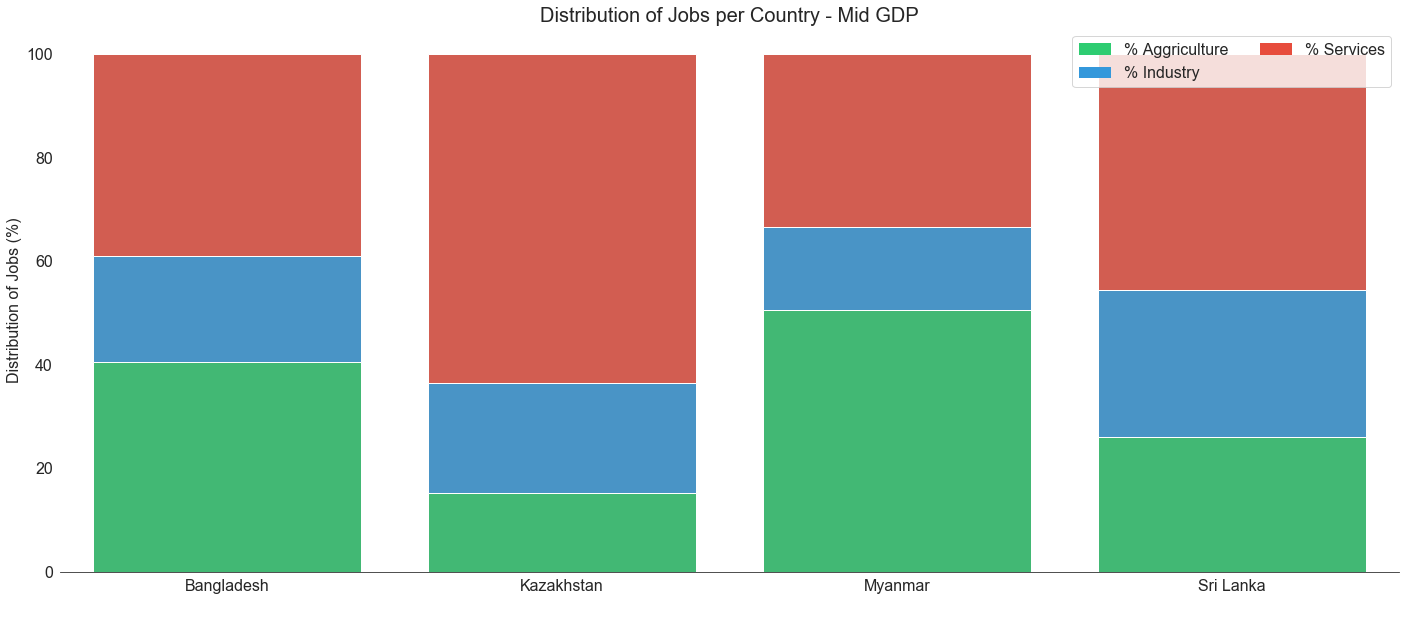

In [17]:
#industry distribution for the mid GDP group

MidSectors = MidGDP.rename(columns =
                                      {'Country Name':'country',
                                       'Employment in agriculture (% of total employment) (modeled ILO estimate)':'agri',
                                       'Employment in industry (% of total employment) (modeled ILO estimate)':'industry',
                                       'Employment in services (% of total employment) (modeled ILO estimate)':'services',
                                       'GDP (current US$)': 'GDP',
                                       'GDP growth (annual %)': 'GDPgrowth'})

MidSectors['total'] = MidSectors['agri'] + MidSectors['industry'] + MidSectors['services']

MidSectors['agriind'] = MidSectors['agri']+MidSectors['industry']

#setting general plotting properties
sns.set_style("white")
sns.set_context({"figure.figsize": (24, 10)})

#creating total chart
sns.barplot(x = MidSectors.country, y = MidSectors.total, color = "#e74c3c")

#adding plot of aggriculture + industry parts on top
second_plot = sns.barplot(x = MidSectors.country, y = MidSectors.agriind, color = "#3498db")

#adding aggriculture parts on top
bottom_plot = sns.barplot(x = MidSectors.country, y = MidSectors.agri, color = "#2ecc71")


topbar = plt.Rectangle((0,0),1,1,fc="#e74c3c", edgecolor = 'none')
middlebar = plt.Rectangle((0,0),1,1,fc="#3498db", edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='#2ecc71',  edgecolor = 'none')
l = plt.legend([bottombar, middlebar, topbar], ['% Aggriculture', '% Industry','% Services'], loc=1, ncol = 2, prop={'size':16})


#defining axe labels
sns.despine(left=True)
bottom_plot.set_ylabel("Distribution of Jobs (%)")
bottom_plot.set_xlabel(" ")
bottom_plot.set_title('Distribution of Jobs per Country - Mid GDP').set_fontsize(20)

#increasing fonts 
for item in ([bottom_plot.xaxis.label, bottom_plot.yaxis.label] +
             bottom_plot.get_xticklabels() + bottom_plot.get_yticklabels()):
    item.set_fontsize(16)

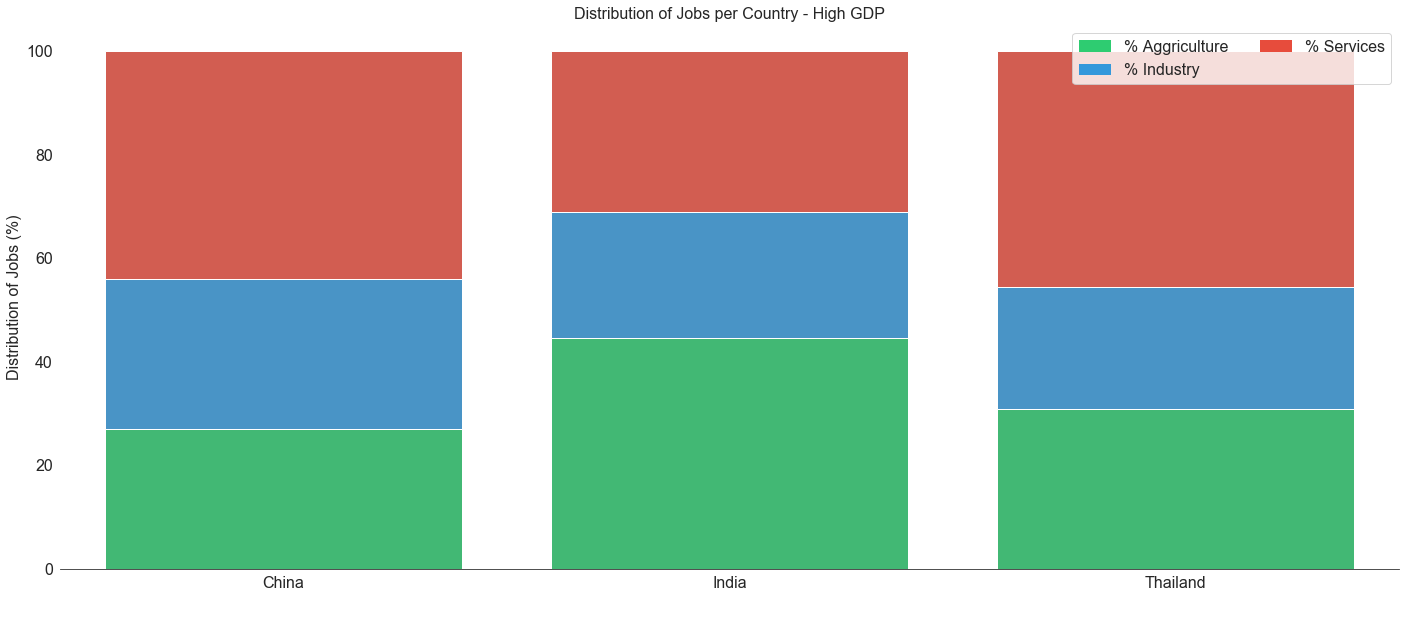

In [18]:
#industry distribution for the high GDP group


HighSectors = HighGDP.rename(columns =
                                      {'Country Name':'country',
                                       'Employment in agriculture (% of total employment) (modeled ILO estimate)':'agri',
                                       'Employment in industry (% of total employment) (modeled ILO estimate)':'industry',
                                       'Employment in services (% of total employment) (modeled ILO estimate)':'services',
                                       'GDP (current US$)': 'GDP',
                                       'GDP growth (annual %)': 'GDPgrowth'})

HighSectors['total'] = HighSectors['agri'] + HighSectors['industry'] + HighSectors['services']

HighSectors['agriind'] = HighSectors['agri']+HighSectors['industry']

#setting general plotting properties
sns.set_style("white")
sns.set_context({"figure.figsize": (24, 10)})

#creating total chart
sns.barplot(x = HighSectors.country, y = HighSectors.total, color = "#e74c3c")

#adding plot of aggriculture + industry parts on top
second_plot = sns.barplot(x = HighSectors.country, y = HighSectors.agriind, color = "#3498db")

#adding aggriculture parts on top
bottom_plot = sns.barplot(x = HighSectors.country, y = HighSectors.agri, color = "#2ecc71")


topbar = plt.Rectangle((0,0),1,1,fc="#e74c3c", edgecolor = 'none')
middlebar = plt.Rectangle((0,0),1,1,fc="#3498db", edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='#2ecc71',  edgecolor = 'none')
l = plt.legend([bottombar, middlebar, topbar], ['% Aggriculture', '% Industry','% Services'], loc=1, ncol = 2, prop={'size':16})


#defining axe labels
sns.despine(left=True)
bottom_plot.set_ylabel("Distribution of Jobs (%)")
bottom_plot.set_xlabel(" ")
bottom_plot.set_title('Distribution of Jobs per Country - High GDP').set_fontsize(16)

#increasing fonts 
for item in ([bottom_plot.xaxis.label, bottom_plot.yaxis.label] +
             bottom_plot.get_xticklabels() + bottom_plot.get_yticklabels()):
    item.set_fontsize(16)

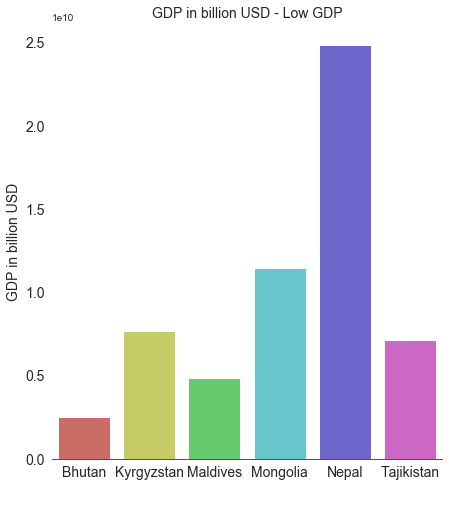

In [19]:
#GDP chart for GDP Low GDP
plt.subplots(figsize=(7,8))
plot = sns.barplot(x = LowSectors.country, y = LowSectors.GDP, palette = "hls")

#defining axe labels
sns.despine(left=True)
plot.set_ylabel("GDP in billion USD")
plot.set_xlabel(" ")
plot.set_title('GDP in billion USD - Low GDP').set_fontsize(16)

for item in ([plot.title, plot.xaxis.label, plot.yaxis.label] +
              plot.get_xticklabels() + plot.get_yticklabels()):
    item.set_fontsize(14)
    
plt.savefig('GDP in billion USD - Low GDP - Graph2.png')

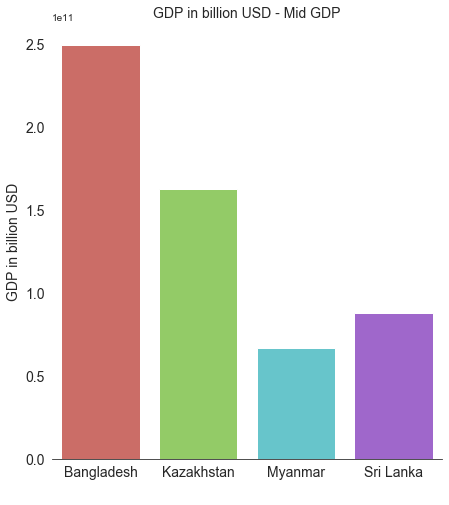

In [20]:
#GDP chart for GDP Mid GDP
plt.subplots(figsize=(7,8))
plot = sns.barplot(x = MidSectors.country, y = MidSectors.GDP, palette = "hls")

#defining axe labels
sns.despine(left=True)
plot.set_ylabel("GDP in billion USD")
plot.set_xlabel(" ")
plot.set_title('GDP in billion USD - Mid GDP').set_fontsize(16)

for item in ([plot.title, plot.xaxis.label, plot.yaxis.label] +
              plot.get_xticklabels() + plot.get_yticklabels()):
    item.set_fontsize(14)
    
plt.savefig('GDP in billion USD - Mid GDP - Graph3.png')

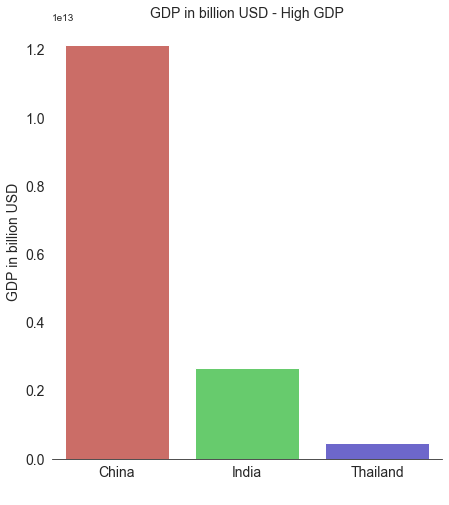

In [21]:
#GDP chart for GDP Mid GDP
plt.subplots(figsize=(7,8))
plot = sns.barplot(x = HighSectors.country, y = HighSectors.GDP, palette = "hls")

#defining axe labels
sns.despine(left=True)
plot.set_ylabel("GDP in billion USD")
plot.set_xlabel(" ")
plot.set_title('GDP in billion USD - High GDP').set_fontsize(16)

for item in ([plot.title, plot.xaxis.label, plot.yaxis.label] +
              plot.get_xticklabels() + plot.get_yticklabels()):
    item.set_fontsize(14)
    
plt.savefig('GDP in billion USD - High GDP - Graph4.png')

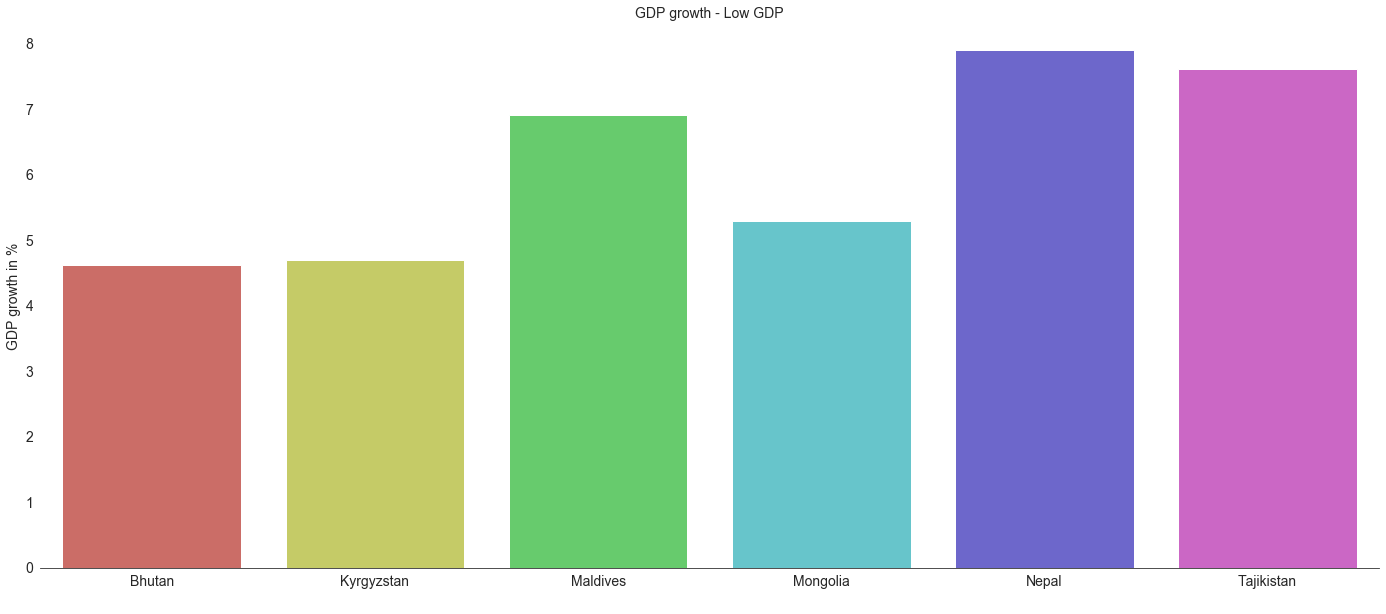

In [22]:
#GDP growth - Low GDP
plot = sns.barplot(x = LowSectors.country, y = LowSectors.GDPgrowth, palette = "hls")

#defining axe labels
sns.despine(left=True)
plot.set_ylabel("GDP growth in %")
plot.set_xlabel(" ")
plot.set_title('GDP growth - Low GDP').set_fontsize(35)

for item in ([plot.title, plot.xaxis.label, plot.yaxis.label] +
              plot.get_xticklabels() + plot.get_yticklabels()):
    item.set_fontsize(14)

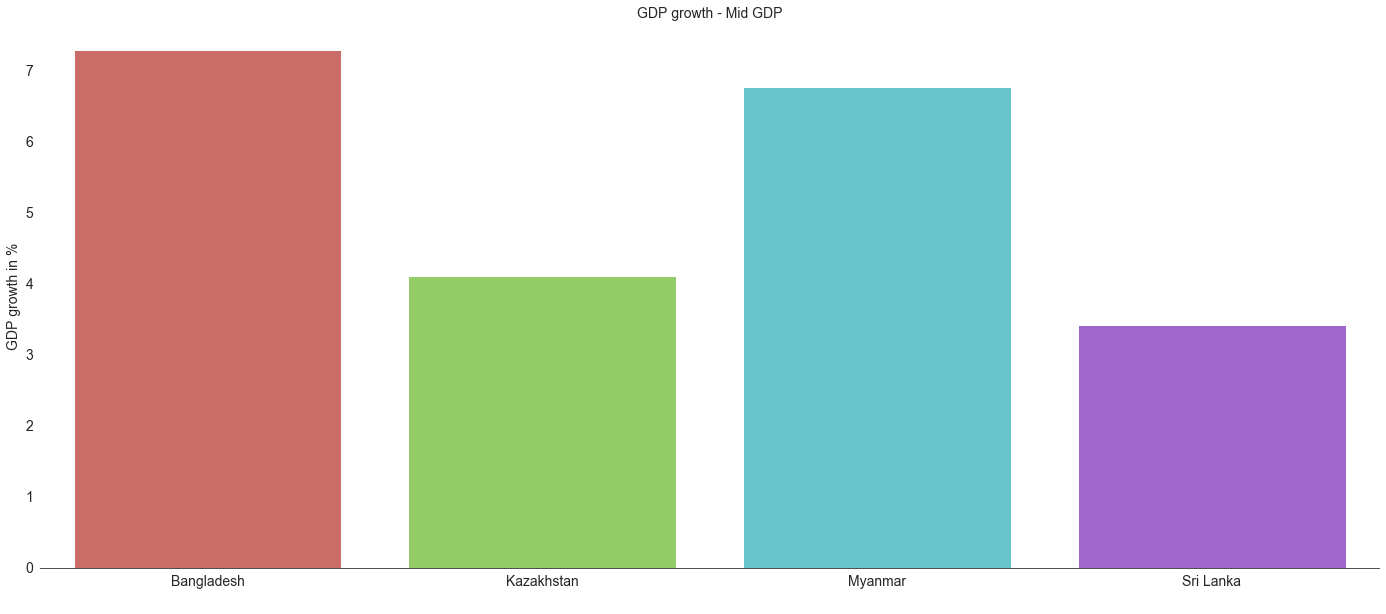

In [23]:
#GDP growth - Mid GDP
plot = sns.barplot(x = MidSectors.country, y = MidSectors.GDPgrowth, palette = "hls")

#defining axe labels
sns.despine(left=True)
plot.set_ylabel("GDP growth in %")
plot.set_xlabel(" ")
plot.set_title('GDP growth - Mid GDP').set_fontsize(16)

for item in ([plot.title, plot.xaxis.label, plot.yaxis.label] +
              plot.get_xticklabels() + plot.get_yticklabels()):
    item.set_fontsize(14)

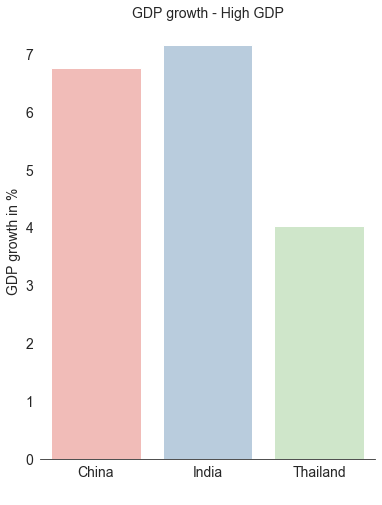

In [24]:
#GDP growth - Low GDP
plt.subplots(figsize=(6,8))
plot = sns.barplot(x = HighSectors.country, y = HighSectors.GDPgrowth, palette = "Pastel1")

#defining axe labels
sns.despine(left=True)
plot.set_ylabel("GDP growth in %")
plot.set_xlabel(" ")
plot.set_title('GDP growth - High GDP').set_fontsize(50)

for item in ([plot.title, plot.xaxis.label, plot.yaxis.label] +
              plot.get_xticklabels() + plot.get_yticklabels()):
    item.set_fontsize(14)
    
plt.savefig('GDP growth - High GDP - Graph6.png')

In [25]:
# Creating the list of values - by the agreed division

GDP_Group = ["MidGDP", "LowGDP", "HighGDP", "HighGDP", "MidGDP", "LowGDP", "LowGDP", "LowGDP", "MidGDP", "LowGDP", "MidGDP", "LowGDP", "HighGDP"]

# Imputing defined values for Dinobots into the column
Dinobots['GDP Group'] = GDP_Group
Dinobots


,Country Name,Counter,Hult Region,Cool Name,Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)","Adolescent fertility rate (births per 1,000 women ages 15-19)",Age dependency ratio (% of working-age population),"Age dependency ratio, old (% of working-age population)",...,"Prevalence of underweight, weight for age (% of children under 5)",Rural population (% of total population),"Services, value added (% of GDP)",Surface area (sq. km),Tax revenue (% of GDP),Urban population (% of total population),Urban population growth (annual %),GDP (current bnUS$),GDP per capita US$,GDP Group
Country Code,,,,,,,,,,,,,,,,,,,,,
BGD,Bangladesh,13,Central Asia,Dinobots,88.000000,81.280508,99.500000,82.962,50.091697,7.728934,...,NaN,64.142,53.476211,1.476300e+05,NaN,35.858,3.255244,249.72,1563.99,MidGDP
BTN,Bhutan,13,Central Asia,Dinobots,97.700000,96.760153,99.100000,20.184,47.371469,8.731593,...,NaN,59.833,37.152890,3.839400e+04,12.030195,40.167,3.052062,2.53,3390.71,LowGDP
CHN,China,13,Central Asia,Dinobots,100.000000,99.972634,100.000000,7.635,39.435946,14.424817,...,NaN,42.040,51.892765,9.562910e+06,NaN,57.960,2.693540,12143.49,8759.04,HighGDP
IND,India,13,Central Asia,Dinobots,92.618660,89.306555,99.206802,13.177,50.289637,8.991999,...,NaN,66.400,48.451018,3.287259e+06,11.182079,33.600,2.314448,2652.55,1981.50,HighGDP
KAZ,Kazakhstan,13,Central Asia,Dinobots,100.000000,100.000000,100.000000,29.750,53.968577,10.988464,...,NaN,42.664,57.424244,2.724902e+06,10.550894,57.336,1.486030,162.89,9030.32,MidGDP
KGZ,Kyrgyzstan,13,Central Asia,Dinobots,100.000000,100.000000,100.000000,32.763,57.712510,6.959558,...,NaN,63.865,49.932447,1.999500e+05,17.046285,36.135,2.463664,7.70,1242.77,LowGDP
MDV,Maldives,13,Central Asia,Dinobots,99.800000,99.864962,99.700000,7.810,31.879757,4.982931,...,NaN,60.620,67.369350,3.000000e+02,NaN,39.380,5.386972,4.87,9801.62,LowGDP
MNG,Mongolia,13,Central Asia,Dinobots,85.869652,55.735523,99.815102,30.993,51.385808,6.046090,...,NaN,31.637,42.279852,1.564120e+06,13.602846,68.363,1.957855,11.43,3671.95,LowGDP
MMR,Myanmar,13,Central Asia,Dinobots,69.814837,59.919135,92.554521,28.509,47.945958,8.227360,...,NaN,69.678,40.370732,6.765900e+05,6.017069,30.322,1.428614,66.72,1249.83,MidGDP


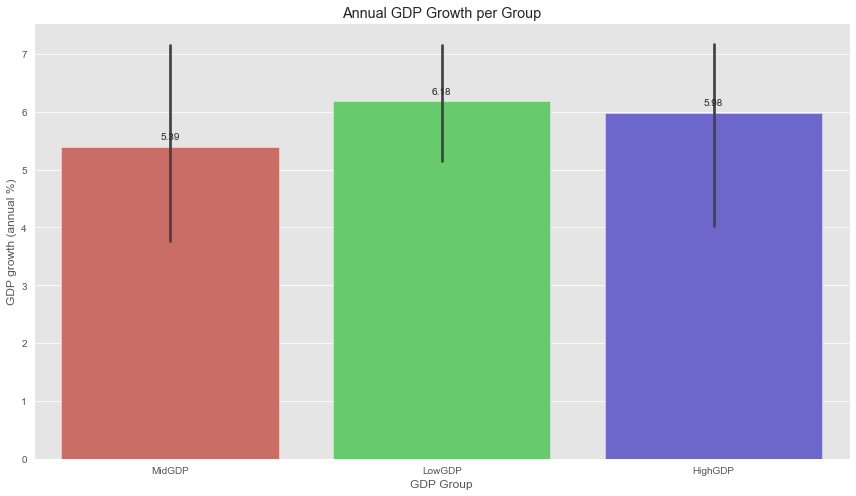

In [26]:
# Annual growth of GDP per group per country
plt.style.use('ggplot')
fig, axes = plt.subplots(figsize=(12, 7))
barplot7 = sns.barplot(x="GDP Group", y="GDP growth (annual %)", data=Dinobots, palette = "hls")

for d in barplot7.patches:
    barplot7.annotate(format(d.get_height(), '.2f'), (d.get_x() + d.get_width() / 2., d.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

barplot7.set_title('Annual GDP Growth per Group')


plt.tight_layout()

plt.savefig("Annual GDP Growth per Group.png")

In [27]:
#######################################################################################################################
# POVERTY SECTION #
#######################################################################################################################

# Taking out only Central Asia dat
c_asia = world_bank [world_bank['Cool Name'] == 'Dinobots']

c_asia.to_excel('Central_Asia2.xlsx', index=False)

In [28]:
# Extracting columns related to poverty + country name

list1 = []
for p in list(c_asia.columns.values):
    if p == 'Country Name' or "poverty" in p or "Poverty" in p or "Income" in p:
        list1.append(p)
        
# slice dataframe on extracted column names
poverty_df2 = c_asia.loc[:, list1].round(2)
del poverty_df2 ['Number of people pushed below the $3.10 ($ 2011 PPP) poverty line by out-of-pocket health care expenditure']

# Moving it to excel
poverty_df2.to_excel("Poverty_DataFrame3.xlsx")
poverty_df2

,Country Name,Income share held by fourth 20%,Income share held by highest 20%,Income share held by lowest 20%,Income share held by second 20%,Income share held by third 20%,Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population),Poverty headcount ratio at $3.20 a day (2011 PPP) (% of population),Poverty headcount ratio at national poverty lines (% of population)
15,Bangladesh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,Bhutan,22.7,44.4,6.7,10.8,15.5,1.5,12.0,8.2
40,China,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.1
89,India,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100,Kazakhstan,22.1,37.4,9.8,13.6,17.1,NaN,0.4,2.5
107,Kyrgyzstan,21.9,37.4,9.9,13.7,17.1,1.5,19.6,25.6
122,Maldives,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
132,Mongolia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136,Myanmar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
140,Nepal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
# Calculating the % of missing values in each column of poverty df
poverty_df2.isnull().mean().round(2)

# Due to so many missing values in poverty sector - we decide not to input data but only look at KAZ and KYRG

Country Name                                                           0.00
Income share held by fourth 20%                                        0.69
Income share held by highest 20%                                       0.69
Income share held by lowest 20%                                        0.69
Income share held by second 20%                                        0.69
Income share held by third 20%                                         0.69
Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population)    0.85
Poverty headcount ratio at $3.20 a day (2011 PPP) (% of population)    0.69
Poverty headcount ratio at national poverty lines (% of population)    0.69
dtype: float64

In [30]:
# Comparaison Kyrgystan and Kazakhstan

#Extracting Kyrgystan and Kazakhstan
kaz_and_kyr = poverty_df2.iloc[4:6, :]


# Imputing zero for missing value in Kaz - https://data.worldbank.org/indicator/SI.POV.DDAY
kaz_extreme = 0
kaz_and_kyr['Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population)'] = kaz_and_kyr['Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population)'].fillna(kaz_extreme).round(2)

kaz_and_kyr

C:\Users\dmows\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,Country Name,Income share held by fourth 20%,Income share held by highest 20%,Income share held by lowest 20%,Income share held by second 20%,Income share held by third 20%,Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population),Poverty headcount ratio at $3.20 a day (2011 PPP) (% of population),Poverty headcount ratio at national poverty lines (% of population)
100,Kazakhstan,22.1,37.4,9.8,13.6,17.1,0.0,0.4,2.5
107,Kyrgyzstan,21.9,37.4,9.9,13.7,17.1,1.5,19.6,25.6


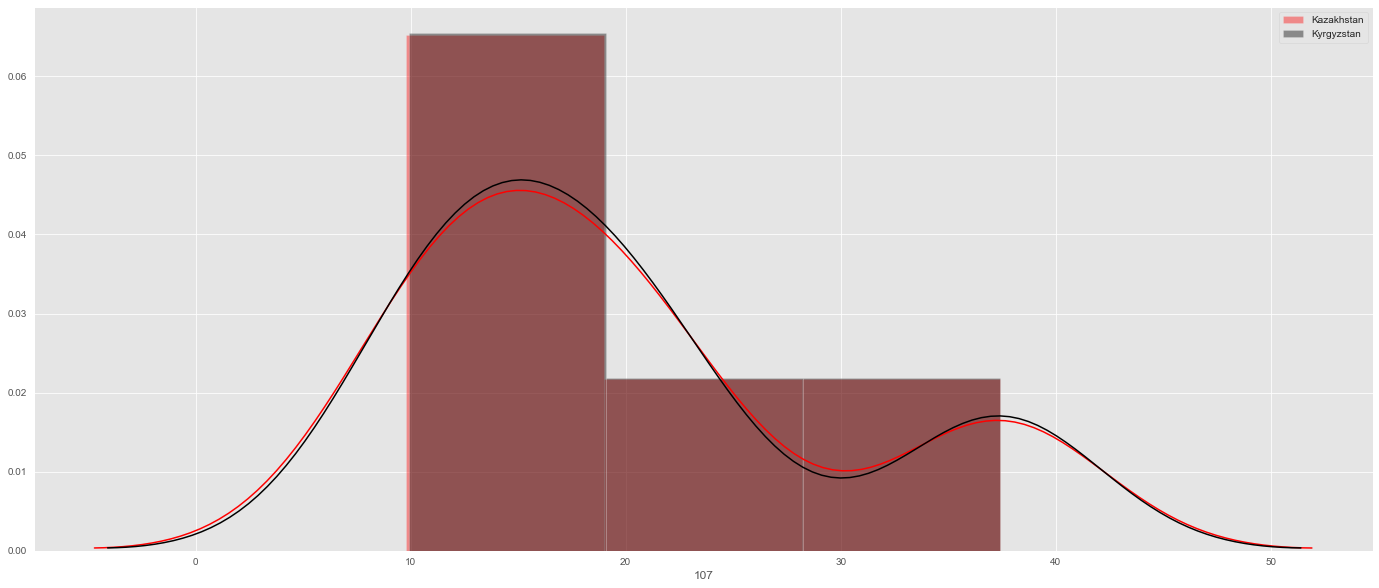

In [31]:
# Creating data frame only from the income share
kaz_and_kyr_hist = kaz_and_kyr.iloc[:, 0:6]


# Rearanging the columns
kaz_and_kyr_hist = kaz_and_kyr_hist[['Country Name', "Income share held by lowest 20%", "Income share held by second 20%", "Income share held by third 20%", "Income share held by fourth 20%", "Income share held by highest 20%"]]
kaz_and_kyr_hist

# Creating histogram of income shares distribution in both countries

sns.distplot( kaz_and_kyr_hist.iloc[0, 1:6], color="red", label="Kazakhstan")
sns.distplot( kaz_and_kyr_hist.iloc[1, 1:6], color="black", label="Kyrgyzstan")
plt.legend()
plt.xticks()
 
plt.show()

In [32]:
# Transposing the data frame
trans_KK = kaz_and_kyr_hist.transpose()

trans_KK.iloc[0, :]

trans_KK

,100,107
Country Name,Kazakhstan,Kyrgyzstan
Income share held by lowest 20%,9.8,9.9
Income share held by second 20%,13.6,13.7
Income share held by third 20%,17.1,17.1
Income share held by fourth 20%,22.1,21.9
Income share held by highest 20%,37.4,37.4


In [33]:
# Printing column names
print(trans_KK.columns)

Int64Index([100, 107], dtype='int64')


In [34]:
# Setting country name as a header of the new data frame 

new_header = trans_KK.iloc[0, :] #grab the first row for the header
trans_KK = trans_KK.iloc[1:6, :] #take the data less the header row
trans_KK.columns = new_header #set the header row as the df header

print(trans_KK.columns)

trans_KK

Index(['Kazakhstan', 'Kyrgyzstan'], dtype='object', name='Country Name')


Country Name,Kazakhstan,Kyrgyzstan
Income share held by lowest 20%,9.8,9.9
Income share held by second 20%,13.6,13.7
Income share held by third 20%,17.1,17.1
Income share held by fourth 20%,22.1,21.9
Income share held by highest 20%,37.4,37.4


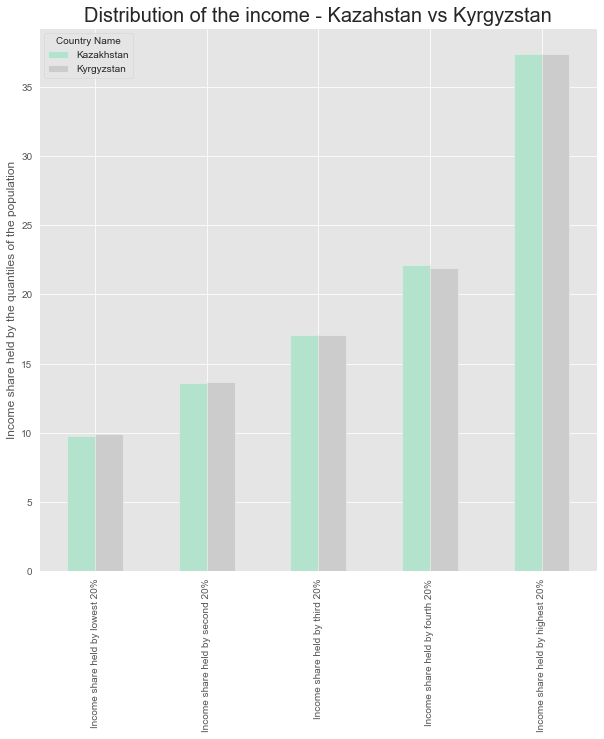

In [35]:
# Comparaison of the income distribution - almost identical
trans_KK.plot(y=["Kazakhstan", "Kyrgyzstan"], kind='bar', colormap = 'Pastel2', figsize=(10,10))
plt.ylabel('Income share held by the quantiles of the population')
plt.title('Distribution of the income - Kazahstan vs Kyrgyzstan',fontsize=20)

# Exporting it to png
plt.savefig("Distribution of the income - Kazahstan vs Kyrgyzstan.png")

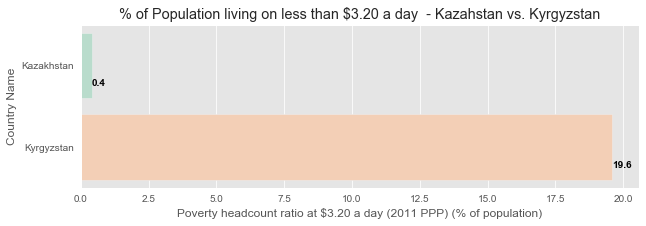

In [36]:
# Comapring poverty rates in both countries

fig, axes = plt.subplots(figsize=(10, 3))

barplot2 = sns.barplot(x='Poverty headcount ratio at $3.20 a day (2011 PPP) (% of population)', y='Country Name', data = kaz_and_kyr, palette = "Pastel2")
barplot2.set_title('% of Population living on less than $3.20 a day  - Kazahstan vs. Kyrgyzstan')
y = kaz_and_kyr.loc[:, "Poverty headcount ratio at $3.20 a day (2011 PPP) (% of population)"].to_list()

for i, v in enumerate(y):
    axes.text(v, i + .25, str(v), color='black', fontweight='bold')


# Exporting it to png
plt.savefig("% of Population living on less than $3.20 a day  - Kazahstan vs. Kyrgyzstan.png")

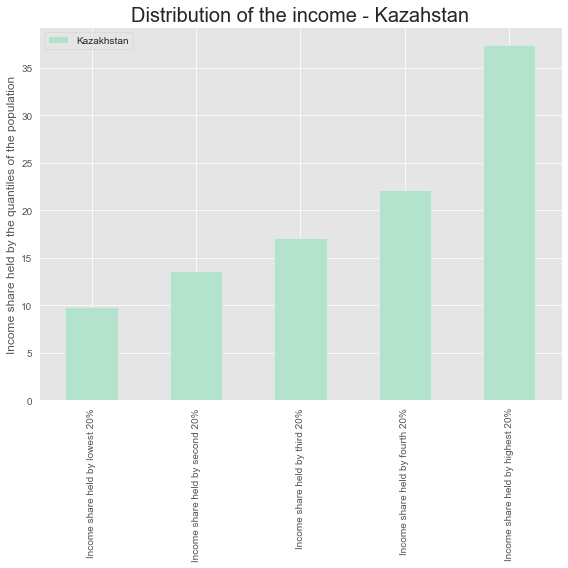

In [37]:
# Comparaison of the income distribution - almost identical - separate graphs 

trans_KK.plot(y="Kazakhstan", kind='bar', colormap = 'Pastel2', figsize=(8,8))
plt.ylabel('Income share held by the quantiles of the population')
plt.title('Distribution of the income - Kazahstan',fontsize=20)

plt.tight_layout()


# Exporting it to png
plt.savefig("Distribution of the income - Kazahstan.png")

plt.show()

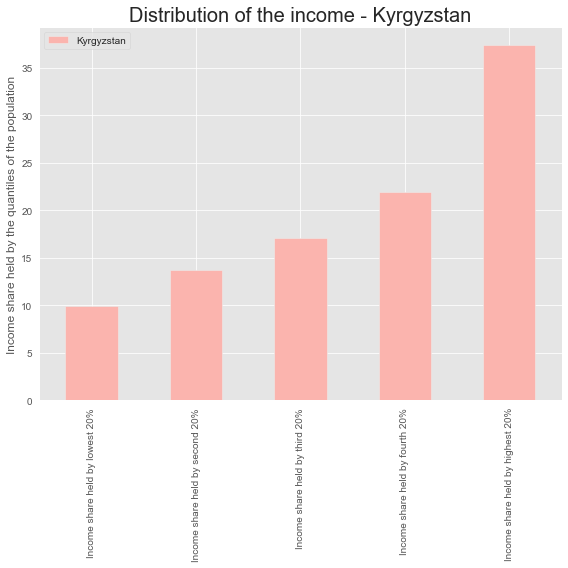

In [38]:
# Comparaison of the income distribution - almost identical - separate graphs 

trans_KK.plot(y="Kyrgyzstan", kind='bar', colormap = 'Pastel1', figsize=(8,8))
plt.ylabel('Income share held by the quantiles of the population')
plt.title('Distribution of the income - Kyrgyzstan',fontsize=20)

plt.tight_layout()

# Exporting it to png
plt.savefig("Distribution of the income - Kyrgyzstan.png")

plt.show()

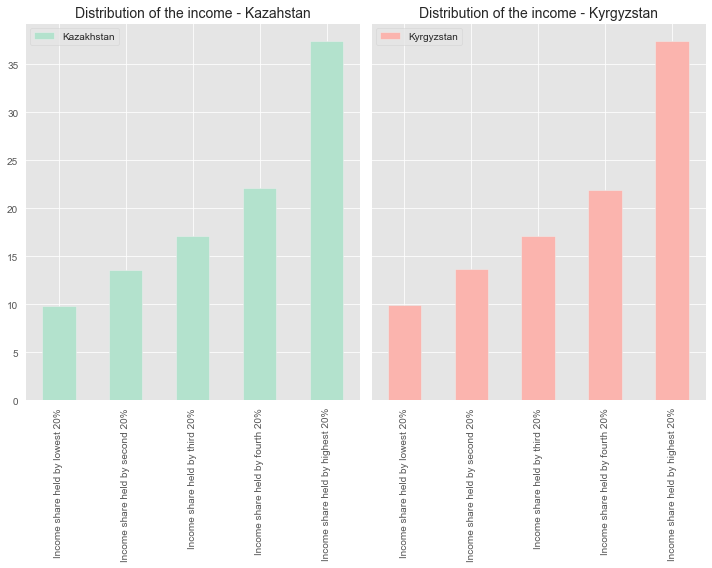

In [39]:
# Comparaison of the income distribution - almost identical 

fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(10,8))


trans_KK.plot(y="Kazakhstan", kind='bar', colormap = 'Pastel2', ax=ax0 )
ax0.set_title('Distribution of the income - Kazahstan',fontsize=14)
ax0.legend(loc='upper left')

trans_KK.plot(y="Kyrgyzstan", kind='bar', colormap = 'Pastel1', ax=ax1 )
ax1.set_title('Distribution of the income - Kyrgyzstan',fontsize=14)
ax1.legend(loc='upper left')


plt.tight_layout()

# Saving png
plt.savefig("Distribution of the income - Kyr vs Kz together.png")

plt.show()


In [40]:
#######################################################################################################################
# HEALTH SECTION #
#######################################################################################################################

# Extracting columns related to health
list2 = []
for h in list(c_asia.columns.values):
    if h == 'Country Name' or "fertility" in h or "Birth" in h or "Death" in h or "Life" in h or "Prevalence" in h or "Population" in h and "Rural" not in h and "Urban" not in h and "urban" not in h and "density" not in h:
        list2.append(h)

# Creating data frame from health columns
health_df = c_asia.loc[:, list2].round(2)

# Exporting health data frame to excel
health_df.to_excel("Health_DataFrame.xlsx")
health_df

,Country Name,"Adolescent fertility rate (births per 1,000 women ages 15-19)","Birth rate, crude (per 1,000 people)",Births attended by skilled health staff (% of total),"Death rate, crude (per 1,000 people)","Life expectancy at birth, total (years)",Population ages 0-14 (% of total population),Population ages 15-64 (% of total population),Population ages 65 and above (% of total population),Population growth (annual %),"Population, female","Population, male","Population, total","Prevalence of HIV, total (% of population ages 15-49)",Prevalence of undernourishment (% of population),"Prevalence of underweight, weight for age (% of children under 5)"
15,Bangladesh,82.96,18.50,NaN,5.53,72.05,28.22,66.63,5.15,1.07,78809034.0,80861559.0,1.596706e+08,0.1,14.7,NaN
22,Bhutan,20.18,17.46,NaN,6.24,71.13,26.22,67.86,5.92,1.20,351066.0,394502.0,7.455680e+05,0.3,NaN,NaN
40,China,7.64,12.43,NaN,7.11,76.47,17.94,71.72,10.35,0.56,674707818.0,711687182.0,1.386395e+09,NaN,8.6,NaN
89,India,13.18,18.08,NaN,7.21,69.17,27.48,66.54,5.98,1.06,642787641.0,695871194.0,1.338659e+09,NaN,14.5,NaN
100,Kazakhstan,29.75,21.64,NaN,7.15,72.95,27.91,64.95,7.14,1.36,9296108.0,8741668.0,1.803778e+07,0.2,2.5,NaN
107,Kyrgyzstan,32.76,24.80,NaN,5.40,71.20,32.18,63.41,4.41,1.93,3131308.0,3066892.0,6.198200e+06,0.2,7.1,NaN
122,Maldives,7.81,14.89,99.5,2.88,78.32,20.39,75.83,3.78,4.30,189427.0,306975.0,4.964020e+05,NaN,10.3,NaN
132,Mongolia,30.99,24.83,NaN,6.30,69.51,29.95,66.06,3.99,1.86,1576723.0,1537056.0,3.113779e+06,0.1,13.4,NaN
136,Myanmar,28.51,17.70,NaN,8.21,66.56,26.85,67.59,5.56,0.63,27654949.0,25727632.0,5.338258e+07,0.8,10.6,NaN
140,Nepal,65.12,20.20,NaN,6.40,70.17,31.34,63.00,5.66,1.33,15074691.0,12552433.0,2.762712e+07,0.1,8.7,NaN


In [41]:
# Deleting skilled staff and underweight from health df

del health_df['Prevalence of underweight, weight for age (% of children under 5)']
del health_df['Births attended by skilled health staff (% of total)']


In [42]:
# Printing names of the columns
print(health_df.columns)

Index(['Country Name',
       'Adolescent fertility rate (births per 1,000 women ages 15-19)',
       'Birth rate, crude (per 1,000 people)',
       'Death rate, crude (per 1,000 people)',
       'Life expectancy at birth, total (years)',
       'Population ages 0-14 (% of total population)',
       'Population ages 15-64 (% of total population)',
       'Population ages 65 and above (% of total population)',
       'Population growth (annual %)', 'Population, female',
       'Population, male', 'Population, total',
       'Prevalence of HIV, total (% of population ages 15-49)',
       'Prevalence of undernourishment (% of population)'],
      dtype='object')


In [43]:
# Adding new column Mortality rate, under-5 (per 1,000 live births) from 2017
# FILE MORTALITY NEEDED IN DIRECTORY

mortality = pd.read_excel('Mortality.xlsx', index=False)


#health_df2 = health_df.insert(5,'Mortality rate, under-5 (per 1,000 live births)', mortality)
#health_df2

# Transforming DataFrame to list
List = mortality.values.tolist()


# List flattening
new_list = [i[0] for i in List]
new_list

[31.9, 30.8, 9.2, 38.7, 10.4, 20.0, 7.8, 9.0, 47.9, 17.0, 33.4, 9.5, 35.9]

In [44]:
# Add new column to health dataframe

health_df['Mortality rate, under-5 (per 1,000 live births)'] = new_list
health_df

,Country Name,"Adolescent fertility rate (births per 1,000 women ages 15-19)","Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)","Life expectancy at birth, total (years)",Population ages 0-14 (% of total population),Population ages 15-64 (% of total population),Population ages 65 and above (% of total population),Population growth (annual %),"Population, female","Population, male","Population, total","Prevalence of HIV, total (% of population ages 15-49)",Prevalence of undernourishment (% of population),"Mortality rate, under-5 (per 1,000 live births)"
15,Bangladesh,82.96,18.50,5.53,72.05,28.22,66.63,5.15,1.07,78809034.0,80861559.0,1.596706e+08,0.1,14.7,31.9
22,Bhutan,20.18,17.46,6.24,71.13,26.22,67.86,5.92,1.20,351066.0,394502.0,7.455680e+05,0.3,NaN,30.8
40,China,7.64,12.43,7.11,76.47,17.94,71.72,10.35,0.56,674707818.0,711687182.0,1.386395e+09,NaN,8.6,9.2
89,India,13.18,18.08,7.21,69.17,27.48,66.54,5.98,1.06,642787641.0,695871194.0,1.338659e+09,NaN,14.5,38.7
100,Kazakhstan,29.75,21.64,7.15,72.95,27.91,64.95,7.14,1.36,9296108.0,8741668.0,1.803778e+07,0.2,2.5,10.4
107,Kyrgyzstan,32.76,24.80,5.40,71.20,32.18,63.41,4.41,1.93,3131308.0,3066892.0,6.198200e+06,0.2,7.1,20.0
122,Maldives,7.81,14.89,2.88,78.32,20.39,75.83,3.78,4.30,189427.0,306975.0,4.964020e+05,NaN,10.3,7.8
132,Mongolia,30.99,24.83,6.30,69.51,29.95,66.06,3.99,1.86,1576723.0,1537056.0,3.113779e+06,0.1,13.4,9.0
136,Myanmar,28.51,17.70,8.21,66.56,26.85,67.59,5.56,0.63,27654949.0,25727632.0,5.338258e+07,0.8,10.6,47.9
140,Nepal,65.12,20.20,6.40,70.17,31.34,63.00,5.66,1.33,15074691.0,12552433.0,2.762712e+07,0.1,8.7,17.0


In [45]:
# Searching and imputing missing values - for China and Maledives 0.1, for India 0.2
# Source : World Bank

health_df.iloc[2,12] = 0.1 # China
health_df.iloc[3,12] = 0.2 # India
health_df.iloc[6,12] = 0.1 # Maledives
health_df

,Country Name,"Adolescent fertility rate (births per 1,000 women ages 15-19)","Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)","Life expectancy at birth, total (years)",Population ages 0-14 (% of total population),Population ages 15-64 (% of total population),Population ages 65 and above (% of total population),Population growth (annual %),"Population, female","Population, male","Population, total","Prevalence of HIV, total (% of population ages 15-49)",Prevalence of undernourishment (% of population),"Mortality rate, under-5 (per 1,000 live births)"
15,Bangladesh,82.96,18.50,5.53,72.05,28.22,66.63,5.15,1.07,78809034.0,80861559.0,1.596706e+08,0.1,14.7,31.9
22,Bhutan,20.18,17.46,6.24,71.13,26.22,67.86,5.92,1.20,351066.0,394502.0,7.455680e+05,0.3,NaN,30.8
40,China,7.64,12.43,7.11,76.47,17.94,71.72,10.35,0.56,674707818.0,711687182.0,1.386395e+09,0.1,8.6,9.2
89,India,13.18,18.08,7.21,69.17,27.48,66.54,5.98,1.06,642787641.0,695871194.0,1.338659e+09,0.2,14.5,38.7
100,Kazakhstan,29.75,21.64,7.15,72.95,27.91,64.95,7.14,1.36,9296108.0,8741668.0,1.803778e+07,0.2,2.5,10.4
107,Kyrgyzstan,32.76,24.80,5.40,71.20,32.18,63.41,4.41,1.93,3131308.0,3066892.0,6.198200e+06,0.2,7.1,20.0
122,Maldives,7.81,14.89,2.88,78.32,20.39,75.83,3.78,4.30,189427.0,306975.0,4.964020e+05,0.1,10.3,7.8
132,Mongolia,30.99,24.83,6.30,69.51,29.95,66.06,3.99,1.86,1576723.0,1537056.0,3.113779e+06,0.1,13.4,9.0
136,Myanmar,28.51,17.70,8.21,66.56,26.85,67.59,5.56,0.63,27654949.0,25727632.0,5.338258e+07,0.8,10.6,47.9
140,Nepal,65.12,20.20,6.40,70.17,31.34,63.00,5.66,1.33,15074691.0,12552433.0,2.762712e+07,0.1,8.7,17.0


In [46]:
# No data available on Bhutan malnutrition - probably because of very high levels of malnutrition among children
# Imputing slightly smaller % as for India

health_df.iloc[1,13] = 14.0 # Bhutan
health_df.iloc[11,13] = 30.1 # Tajikistan - https://www.wfp.org/countries/tajikistan huge outlier


health_df.to_excel("Health_DataFrame_Clean.xlsx")

health_df

,Country Name,"Adolescent fertility rate (births per 1,000 women ages 15-19)","Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)","Life expectancy at birth, total (years)",Population ages 0-14 (% of total population),Population ages 15-64 (% of total population),Population ages 65 and above (% of total population),Population growth (annual %),"Population, female","Population, male","Population, total","Prevalence of HIV, total (% of population ages 15-49)",Prevalence of undernourishment (% of population),"Mortality rate, under-5 (per 1,000 live births)"
15,Bangladesh,82.96,18.50,5.53,72.05,28.22,66.63,5.15,1.07,78809034.0,80861559.0,1.596706e+08,0.1,14.7,31.9
22,Bhutan,20.18,17.46,6.24,71.13,26.22,67.86,5.92,1.20,351066.0,394502.0,7.455680e+05,0.3,14.0,30.8
40,China,7.64,12.43,7.11,76.47,17.94,71.72,10.35,0.56,674707818.0,711687182.0,1.386395e+09,0.1,8.6,9.2
89,India,13.18,18.08,7.21,69.17,27.48,66.54,5.98,1.06,642787641.0,695871194.0,1.338659e+09,0.2,14.5,38.7
100,Kazakhstan,29.75,21.64,7.15,72.95,27.91,64.95,7.14,1.36,9296108.0,8741668.0,1.803778e+07,0.2,2.5,10.4
107,Kyrgyzstan,32.76,24.80,5.40,71.20,32.18,63.41,4.41,1.93,3131308.0,3066892.0,6.198200e+06,0.2,7.1,20.0
122,Maldives,7.81,14.89,2.88,78.32,20.39,75.83,3.78,4.30,189427.0,306975.0,4.964020e+05,0.1,10.3,7.8
132,Mongolia,30.99,24.83,6.30,69.51,29.95,66.06,3.99,1.86,1576723.0,1537056.0,3.113779e+06,0.1,13.4,9.0
136,Myanmar,28.51,17.70,8.21,66.56,26.85,67.59,5.56,0.63,27654949.0,25727632.0,5.338258e+07,0.8,10.6,47.9
140,Nepal,65.12,20.20,6.40,70.17,31.34,63.00,5.66,1.33,15074691.0,12552433.0,2.762712e+07,0.1,8.7,17.0


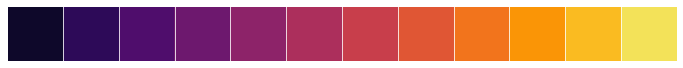

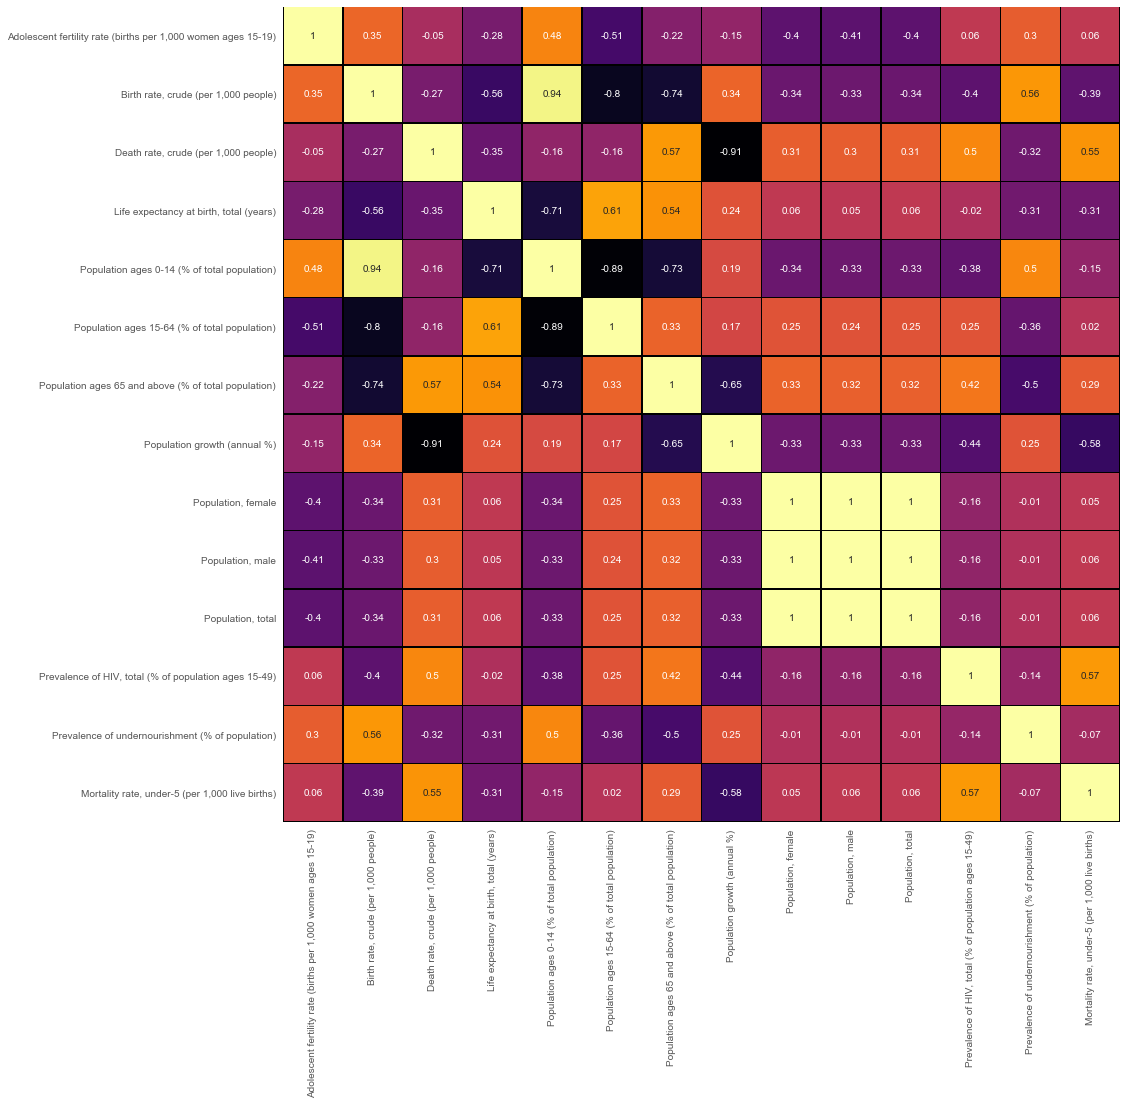

In [47]:
# Heatmap on health

health_df_corr = health_df.corr().round(2)

# Using palplot to view a color scheme
sns.palplot(sns.color_palette('inferno', 12))


# specifying plot size
fig, ax = plt.subplots(figsize=(15,15))


# creating a heatmap
sns.heatmap(health_df_corr,
            cmap = 'inferno',
            square = False,
            annot = True,
            linecolor = 'black',
            linewidths = 0.5,
            cbar = False)

# reconfiguring the plot
bottom, top = plt.ylim() # discover the values for bottom and top
bottom += 0.5            # add 0.5 to the bottom
top -= 0.5               # subtract 0.5 from the top
plt.ylim(bottom, top)    # update the ylim(bottom, top) values

# saving the figure and displaying the plot
plt.savefig('Health Correlation Heatmap 2.png')
plt.show()



In [48]:
# Extracting only strong positive correlations from the health heatmap

strong_pos_corr = health_df_corr [health_df_corr.loc[:,:] >= 0.80]
strong_pos_corr

# Population ages 0-14 (% of total population) with Birth rate, crude (per 1,000 people) - obvious

,"Adolescent fertility rate (births per 1,000 women ages 15-19)","Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)","Life expectancy at birth, total (years)",Population ages 0-14 (% of total population),Population ages 15-64 (% of total population),Population ages 65 and above (% of total population),Population growth (annual %),"Population, female","Population, male","Population, total","Prevalence of HIV, total (% of population ages 15-49)",Prevalence of undernourishment (% of population),"Mortality rate, under-5 (per 1,000 live births)"
"Adolescent fertility rate (births per 1,000 women ages 15-19)",1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Birth rate, crude (per 1,000 people)",NaN,1.00,NaN,NaN,0.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Death rate, crude (per 1,000 people)",NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Life expectancy at birth, total (years)",NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Population ages 0-14 (% of total population),NaN,0.94,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Population ages 15-64 (% of total population),NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Population ages 65 and above (% of total population),NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Population growth (annual %),NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
"Population, female",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN
"Population, male",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN


In [49]:
# Extracting only strong negative correlations from the health heatmap

strong_neg_corr = health_df_corr [health_df_corr.loc[:,:] <= - 0.8]
strong_neg_corr


,"Adolescent fertility rate (births per 1,000 women ages 15-19)","Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)","Life expectancy at birth, total (years)",Population ages 0-14 (% of total population),Population ages 15-64 (% of total population),Population ages 65 and above (% of total population),Population growth (annual %),"Population, female","Population, male","Population, total","Prevalence of HIV, total (% of population ages 15-49)",Prevalence of undernourishment (% of population),"Mortality rate, under-5 (per 1,000 live births)"
"Adolescent fertility rate (births per 1,000 women ages 15-19)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Birth rate, crude (per 1,000 people)",NaN,NaN,NaN,NaN,NaN,-0.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Death rate, crude (per 1,000 people)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.91,NaN,NaN,NaN,NaN,NaN,NaN
"Life expectancy at birth, total (years)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Population ages 0-14 (% of total population),NaN,NaN,NaN,NaN,NaN,-0.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Population ages 15-64 (% of total population),NaN,-0.8,NaN,NaN,-0.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Population ages 65 and above (% of total population),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Population growth (annual %),NaN,NaN,-0.91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Population, female",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Population, male",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


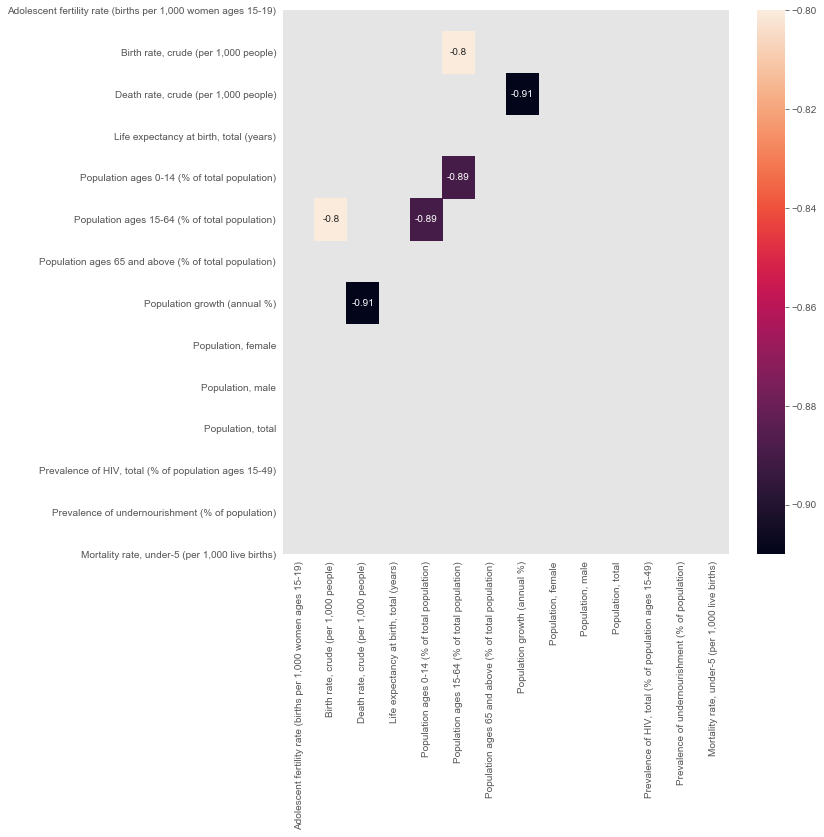

In [50]:
# Heatmap of strong negative correlations

plt.figure(figsize = (10,10))

sns.heatmap(strong_neg_corr, annot=True)

In [51]:
# Mortality rate among children

child_mortality = health_df.loc[:, ("Country Name", "Mortality rate, under-5 (per 1,000 live births)")]
child_mortality


,Country Name,"Mortality rate, under-5 (per 1,000 live births)"
15,Bangladesh,31.9
22,Bhutan,30.8
40,China,9.2
89,India,38.7
100,Kazakhstan,10.4
107,Kyrgyzstan,20.0
122,Maldives,7.8
132,Mongolia,9.0
136,Myanmar,47.9
140,Nepal,17.0


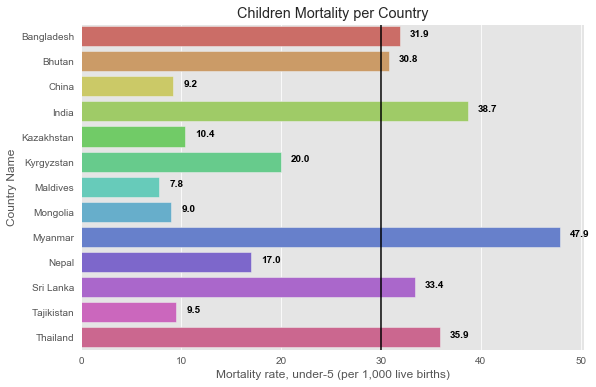

In [52]:
# Mortality rate among children - cut at 30 - enhanced barplot

mortality_cut = 30

fig, axes = plt.subplots(figsize=(9, 6))
plt.style.use('ggplot')


barplot3 =  sns.barplot(x='Mortality rate, under-5 (per 1,000 live births)', y='Country Name', data = child_mortality, palette = "hls")
y = child_mortality.loc[:, "Mortality rate, under-5 (per 1,000 live births)"].to_list()

for i, v in enumerate(y):
    axes.text(v + 1 , i, str(v), color='black', fontweight='bold')

barplot3.set_xlabel('Mortality rate, under-5 (per 1,000 live births)')
barplot3.set_title('Children Mortality per Country')
plt.axvline(x=mortality_cut, color = "k")

plt.savefig("Children Mortality per Country1.png")
plt.show()

In [53]:
# Comparing prevelance of HIV

hiv_prev = health_df.loc[:, ("Country Name", "Prevalence of HIV, total (% of population ages 15-49)")]
hiv_prev

,Country Name,"Prevalence of HIV, total (% of population ages 15-49)"
15,Bangladesh,0.1
22,Bhutan,0.3
40,China,0.1
89,India,0.2
100,Kazakhstan,0.2
107,Kyrgyzstan,0.2
122,Maldives,0.1
132,Mongolia,0.1
136,Myanmar,0.8
140,Nepal,0.1


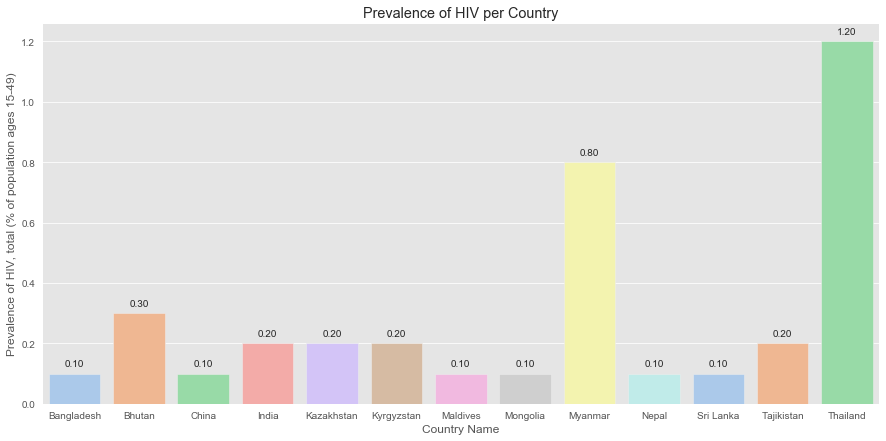

In [54]:
# Comparing prevelance of HIV in different countries, using barplot
fig, axes = plt.subplots(figsize=(15, 7))
plt.style.use('ggplot')


barplot4 =  sns.barplot(y='Prevalence of HIV, total (% of population ages 15-49)', x='Country Name', data = hiv_prev, palette = "pastel")


totals = []

for p in barplot4.patches:
    barplot4.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

barplot4.set_title('Prevalence of HIV per Country')

plt.savefig("Prevalence of HIV per Country.png")
plt.show()

In [55]:
# Analyzing Military expenses

army_df = c_asia.loc[:, ("Country Name", "Country Code", "Armed forces personnel (% of total labor force)", "Military expenditure (% of GDP)")]
army_df

# Nothing very big or very small

,Country Name,Country Code,Armed forces personnel (% of total labor force),Military expenditure (% of GDP)
15,Bangladesh,BGD,0.328475,1.375058
22,Bhutan,BTN,NaN,NaN
40,China,CHN,0.342266,1.896510
89,India,IND,0.599855,2.509625
100,Kazakhstan,KAZ,0.769698,0.894092
107,Kyrgyzstan,KGZ,0.810326,1.668933
122,Maldives,MDV,NaN,NaN
132,Mongolia,MNG,1.377542,0.744867
136,Myanmar,MMR,2.109319,3.242343
140,Nepal,NPL,0.711162,1.605500


In [56]:
#######################################################################################################################
# EDUCATION SECTION #
#######################################################################################################################

# Extracting columns related to education
list3 = []
for e in list(c_asia.columns.values):
    if e == 'Country Name' or "Literacy" in e or "Education" in e or "education" in e:
        list3.append(e)

# Creating data frame from health columns
education_df = c_asia.loc[:, list3].round(2)

# Exporting health data frame to excel
education_df.to_excel("Education_DataFrame.xlsx")
education_df

# Will not input data for educational columns that are all empty - countries report different divisions
# Decided to use literacy data instead - available in the World Bank

,Country Name,"Educational attainment, Doctoral or equivalent, population 25+, total (%) (cumulative)","Educational attainment, at least Bachelor's or equivalent, population 25+, total (%) (cumulative)","Educational attainment, at least Master's or equivalent, population 25+, total (%) (cumulative)","Educational attainment, at least completed lower secondary, population 25+, total (%) (cumulative)","Educational attainment, at least completed post-secondary, population 25+, total (%) (cumulative)","Educational attainment, at least completed primary, population 25+ years, total (%) (cumulative)","Educational attainment, at least completed short-cycle tertiary, population 25+, total (%) (cumulative)","Educational attainment, at least completed upper secondary, population 25+, total (%) (cumulative)","Government expenditure on education, total (% of government expenditure)","Literacy rate, adult total (% of people ages 15 and above)","Literacy rate, youth total (% of people ages 15-24)"
15,Bangladesh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.89,92.95
22,Bhutan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.04,NaN,NaN
40,China,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89,India,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100,Kazakhstan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.42,NaN,NaN
107,Kyrgyzstan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.64,NaN,NaN
122,Maldives,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
132,Mongolia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.49,NaN,NaN
136,Myanmar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.15,NaN,NaN
140,Nepal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.75,NaN,NaN


In [57]:
# Create new data frame, based on education, with new data for litracy

literacy_df = pd.DataFrame.copy(education_df)
literacy_df

,Country Name,"Educational attainment, Doctoral or equivalent, population 25+, total (%) (cumulative)","Educational attainment, at least Bachelor's or equivalent, population 25+, total (%) (cumulative)","Educational attainment, at least Master's or equivalent, population 25+, total (%) (cumulative)","Educational attainment, at least completed lower secondary, population 25+, total (%) (cumulative)","Educational attainment, at least completed post-secondary, population 25+, total (%) (cumulative)","Educational attainment, at least completed primary, population 25+ years, total (%) (cumulative)","Educational attainment, at least completed short-cycle tertiary, population 25+, total (%) (cumulative)","Educational attainment, at least completed upper secondary, population 25+, total (%) (cumulative)","Government expenditure on education, total (% of government expenditure)","Literacy rate, adult total (% of people ages 15 and above)","Literacy rate, youth total (% of people ages 15-24)"
15,Bangladesh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.89,92.95
22,Bhutan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.04,NaN,NaN
40,China,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89,India,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100,Kazakhstan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.42,NaN,NaN
107,Kyrgyzstan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.64,NaN,NaN
122,Maldives,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
132,Mongolia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.49,NaN,NaN
136,Myanmar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.15,NaN,NaN
140,Nepal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.75,NaN,NaN


In [58]:
# Deleting empty columns from literacy data frame, as they will not be used

for c in literacy_df:
    if  "Educational" in c:
        del literacy_df[c]


###################################################################################################

# For Youth Literacy - use data from 2014-2018 that we have - https://data.worldbank.org/indicator/SE.ADT.1524.LT.ZS?view=chart
# Input data, with the year last reported

# BGD	 93.30 	2018
# BTN	 93.09 	2017
# CHN	 99.78 	2018
# IND	 91.66 	2018
# KAZ	 99.90 	2010
# KGZ	 99.75 	2018
# LKA	 98.86 	2017
# MDV	 98.75 	2016
# MMR	 84.75 	2016
# MNG	 98.63 	2018
# NPL	 92.39 	2018
# THA	 98.15 	2015
# TJK	 99.90 	2014

# Creating the list of values
literacy_list1 = [93.30, 93.09, 99.78, 91.66 , 99.90 , 99.75 ,  98.86 ,  98.75, 84.75, 98.63, 92.39 , 98.15 ,  99.90]

# Imputing found values for youth literacy into the column
literacy_df['Literacy rate, youth total (% of people ages 15-24)'] = literacy_list1


###################################################################################################

# For Adult Literacy - use data from 2010-2018 that we have - https://data.worldbank.org/indicator/SE.ADT.LITR.ZS?view=chart
# Input data, with the year last reported

# BGD	 73.91 	2018
# BTN	 66.56 	2017
# CHN	 96.84 	2018
# IND	 74.37 	2018
# KAZ	 99.78 	2010
# KGZ	 99.59 	2018
# LKA	 91.90 	2017
# MDV	 97.73 	2016
# MMR	 75.55 	2016
# MNG	 98.42 	2018
# NPL	 67.91 	2018
# THA	 92.87 	2015
# TJK	 99.80 	2014


# Creating the list of values
literacy_list2 = [73.91, 66.56,  96.84 , 74.37,  99.78 ,  99.59 , 91.90 , 97.73,  75.55,  98.42,  67.91,  92.87,  99.80]

# Imputing found values for youth literacy into the column
literacy_df['Literacy rate, adult total (% of people ages 15 and above)'] = literacy_list2


###################################################################################################

# Creating new column for Literacy rate, youth female (% of females ages 15-24)
# https://data.worldbank.org/indicator/SE.ADT.1524.LT.MA.ZS?view=chart


# BGD	 94.91 	2018
# BTN	 92.89 	2017
# CHN	 99.78 	2018
# IND	 90.17 	2018
# KAZ	 99.85 	2010
# KGZ	 99.81 	2018
# LKA	 99.15 	2017
# MDV	 99.09 	2016
# MMR	 84.41 	2016
# MNG	 99.08 	2018
# NPL	 90.88 	2018
# THA	 98.29 	2015
# TJK	 99.90 	2014

# Creating the list of values
literacy_list3 = [94.91, 92.89 , 99.78 ,  90.17,  99.85 , 99.81 ,  99.15 , 99.09 ,  84.41 ,  99.08 ,  90.88 , 98.29 ,  99.90]

# Imputing found values for youth literacy into the column
literacy_df['Literacy rate, youth female (% of females ages 15-24)'] = literacy_list3


###################################################################################################

# Creating new column for Literacy rate, adult female (% of females ages 15-24)
# https://data.worldbank.org/indicator/SE.ADT.1524.LT.MA.ZS?view=chart

# BGD	 71.18 	2018
# BTN	 57.08 	 2017 
# CHN	 95.16 	2018
# IND	 65.79 	2018
# KAZ	 99.74 	 2010 
# KGZ	 99.50 	2018
# LKA	 90.97 	 2017 
# MDV	 98.11 	 2016 
# MMR	 71.85 	 2016 
# MNG	 98.65 	2018
# NPL	 59.72 	2018
# THA	 91.19 	 2015 
# TJK	 99.70 	 2014

# Creating the list of values
literacy_list4 = [71.18 , 57.08 , 95.16 ,65.79 ,99.74 , 99.50 ,90.97 , 98.11,71.85 ,98.65, 59.72 , 91.19 , 99.70]

# Imputing found values for adult literacy into the column
literacy_df['Literacy rate, adult female (% of females ages 15-24)'] = literacy_list4


###################################################################################################

# Creating new column for Literacy rate, youth male (% of males ages 15-24)
# https://data.worldbank.org/indicator/SE.ADT.1524.LT.MA.ZS?view=chart

# BGD	 91.80 	2018
# BTN	 93.27 	 2017 
# CHN	 99.78 	2018
# IND	 92.99 	2018
# KAZ	 99.94 	 2010 
# KGZ	 99.69 	2018
# LKA	 98.55 	 2017 
# MDV	 98.39 	 2016 
# MMR	 85.12 	 2016 
# MNG	 98.19 	2018
# NPL	 94.03 	2018
# THA	 98.00 	 2015 
# TJK	 99.86 	 2014


# Creating the list of values
literacy_list5 = [91.80 ,  93.27  , 99.78  , 92.99 ,  99.94  ,  99.69 ,  98.55 , 98.39  , 85.12  ,  98.19  ,  94.03  , 98.00 ,  99.86]

# Imputing found values for adult literacy into the column
literacy_df['Literacy rate, youth male (% of males ages 15-24)'] = literacy_list5

###################################################################################################

# Creating new column for Literacy rate, adult male (% of males ages 15 and above)
# https://data.worldbank.org/indicator/SE.ADT.1524.LT.MA.ZS?view=chart

# BGD	 76.67 	2018
# BTN	 75.02 	2017
# CHN	 98.47 	2018
# IND	 82.37 	2018
# KAZ	 99.83 	2010
# KGZ	 99.68 	2018
# LKA	 92.98 	2017
# MDV	 97.30 	2016
# MMR	 80.01 	2016
# MNG	 98.19 	2018
# NPL	 78.59 	2018
# THA	 94.66 	2015
# TJK	 99.82 	2014



# Creating the list of values
literacy_list6 = [76.67  ,  75.02  ,  98.47  ,  82.37 ,  99.83 , 99.68 ,  92.98 ,  97.30  ,  80.01  , 98.19  , 78.59  ,   94.66  , 99.82]

# Imputing found values for adult literacy into the column
literacy_df['Literacy rate, adult male (% of males ages 15 and above)'] = literacy_list6


###################################################################################################

# Government expenditure on education, total (% of government expenditure)
# https://data.worldbank.org/indicator/SE.XPD.TOTL.GB.ZS
# We replace the data point with the most recently reported in World Bank
# For China - we have calculated it ourselves based on the governmental reports

# BGD	 14.65 	2018
# BTN	 22.77 	2018
# CHN	14.80 	2017 http://www.gov.cn/xinwen/2018-01/25/content_5260672.htm
# IND	 14.05 	2013
# KAZ	 11.43 	2017
# KGZ	 15.88 	2017
# LKA	 11.33 	2018
# MDV	 11.29 	2016
# MMR	 9.99 	2018
# MNG	 13.49 	2017
# NPL	 14.17 	2018
# THA	 19.13 	2013
# TJK	 16.39 	2015

# Creating the list of values
literacy_list7 = [14.65  ,  22.77  ,  14.80  ,  14.05  ,  11.43 ,  15.88  ,  11.33 	, 11.29  ,  9.99  ,  13.49 ,   14.17 ,   19.13 ,  16.39]

# Imputing found values for adult literacy into the column
literacy_df['Government expenditure on education, total (% of government expenditure)'] = literacy_list7


literacy_df

,Country Name,"Government expenditure on education, total (% of government expenditure)","Literacy rate, adult total (% of people ages 15 and above)","Literacy rate, youth total (% of people ages 15-24)","Literacy rate, youth female (% of females ages 15-24)","Literacy rate, adult female (% of females ages 15-24)","Literacy rate, youth male (% of males ages 15-24)","Literacy rate, adult male (% of males ages 15 and above)"
15,Bangladesh,14.65,73.91,93.30,94.91,71.18,91.80,76.67
22,Bhutan,22.77,66.56,93.09,92.89,57.08,93.27,75.02
40,China,14.80,96.84,99.78,99.78,95.16,99.78,98.47
89,India,14.05,74.37,91.66,90.17,65.79,92.99,82.37
100,Kazakhstan,11.43,99.78,99.90,99.85,99.74,99.94,99.83
107,Kyrgyzstan,15.88,99.59,99.75,99.81,99.50,99.69,99.68
122,Maldives,11.33,91.90,98.86,99.15,90.97,98.55,92.98
132,Mongolia,11.29,97.73,98.75,99.09,98.11,98.39,97.30
136,Myanmar,9.99,75.55,84.75,84.41,71.85,85.12,80.01
140,Nepal,13.49,98.42,98.63,99.08,98.65,98.19,98.19


In [59]:
# Check what are the types of data in the literacy data frame
literacy_df.info(verbose = True)

# Export literacy data frame to excel
literacy_df.to_excel('Literacy_df_clean.xlsx')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13 entries, 15 to 192
Data columns (total 8 columns):
Country Name                                                                13 non-null object
Government expenditure on education, total (% of government expenditure)    13 non-null float64
Literacy rate, adult total (% of people ages 15 and above)                  13 non-null float64
Literacy rate, youth total (% of people ages 15-24)                         13 non-null float64
Literacy rate, youth female (% of females ages 15-24)                       13 non-null float64
Literacy rate, adult female (% of females ages 15-24)                       13 non-null float64
Literacy rate, youth male (% of males ages 15-24)                           13 non-null float64
Literacy rate, adult male (% of males ages 15 and above)                    13 non-null float64
dtypes: float64(7), object(1)
memory usage: 936.0+ bytes


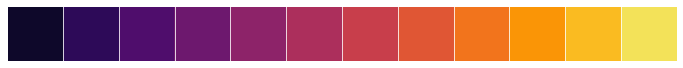

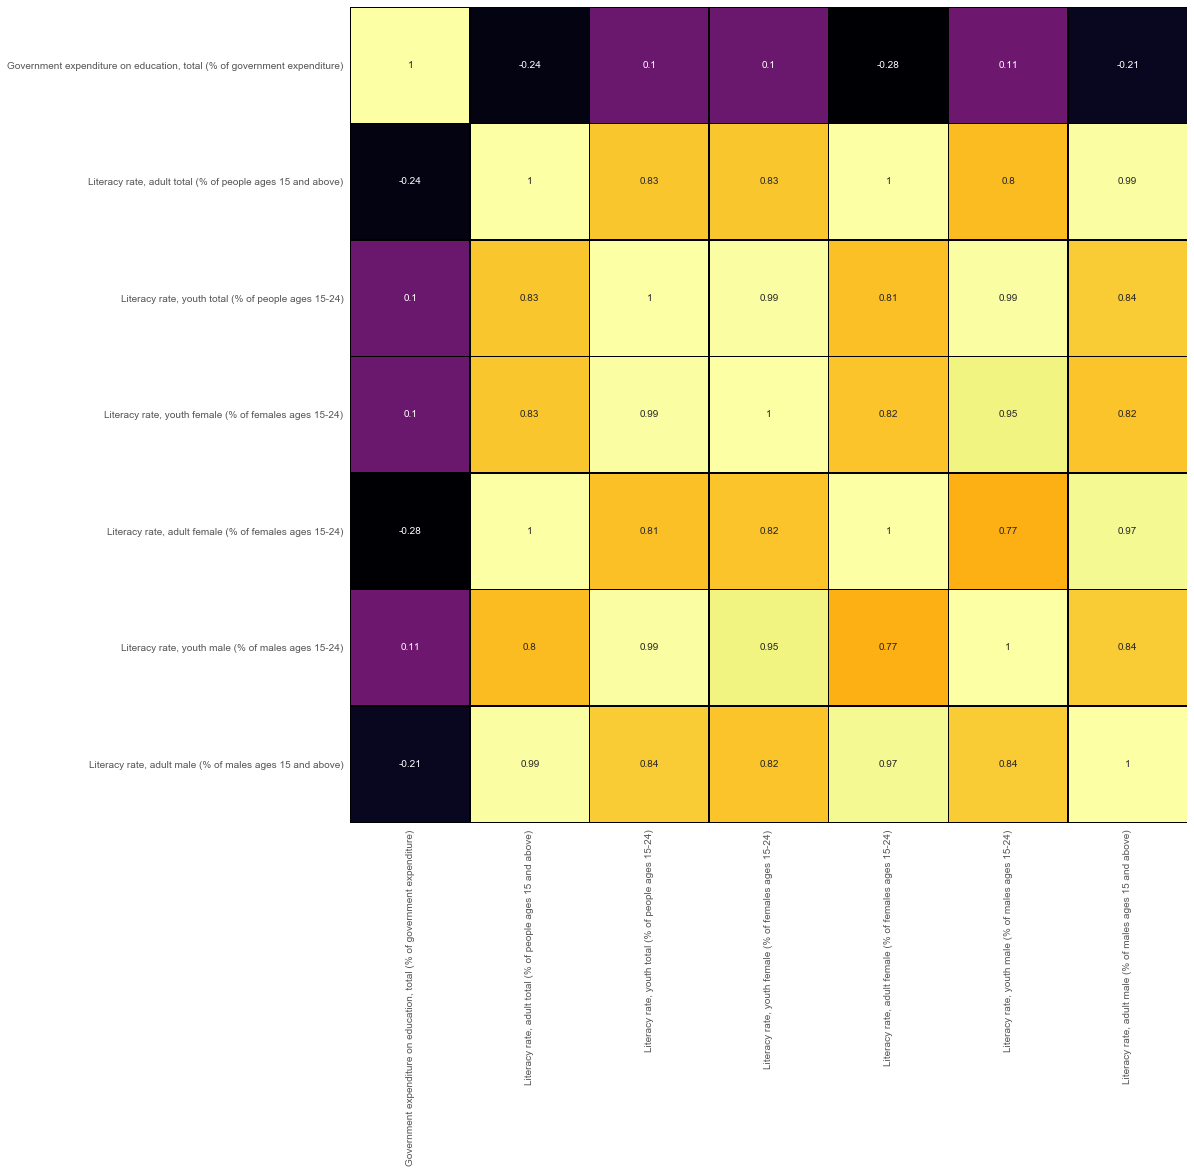

In [60]:
# generating a correlation matrix
literacy_df_corr = literacy_df.corr().round(2)

# Using palplot to view a color scheme
sns.palplot(sns.color_palette('inferno', 12))


# specifying plot size
fig, ax = plt.subplots(figsize=(15,15))


# creating a heatmap
sns.heatmap(literacy_df_corr,
            cmap = 'inferno',
            square = False,
            annot = True,
            linecolor = 'black',
            linewidths = 0.5,
            cbar = False)

# reconfiguring the plot
bottom, top = plt.ylim() # discover the values for bottom and top
bottom += 0.5            # add 0.5 to the bottom
top -= 0.5               # subtract 0.5 from the top
plt.ylim(bottom, top)    # update the ylim(bottom, top) values

# saving the figure and displaying the plot
plt.savefig('Litrature Correlation Heatmap.png')
plt.show()


In [61]:
# Describe data

literacy_df.describe().round(2)

,"Government expenditure on education, total (% of government expenditure)","Literacy rate, adult total (% of people ages 15 and above)","Literacy rate, youth total (% of people ages 15-24)","Literacy rate, youth female (% of females ages 15-24)","Literacy rate, adult female (% of females ages 15-24)","Literacy rate, youth male (% of males ages 15-24)","Literacy rate, adult male (% of males ages 15 and above)"
count,13.00,13.00,13.00,13.00,13.00,13.00,13.00
mean,14.57,87.33,96.07,96.02,84.51,96.12,90.28
std,3.50,13.32,4.66,4.99,16.65,4.43,9.99
min,9.99,66.56,84.75,84.41,57.08,85.12,75.02
25%,11.43,74.37,93.09,92.89,71.18,93.27,80.01
50%,14.17,92.87,98.63,99.08,91.19,98.19,94.66
75%,15.88,98.42,99.75,99.78,98.65,99.69,98.47
max,22.77,99.80,99.90,99.90,99.74,99.94,99.83


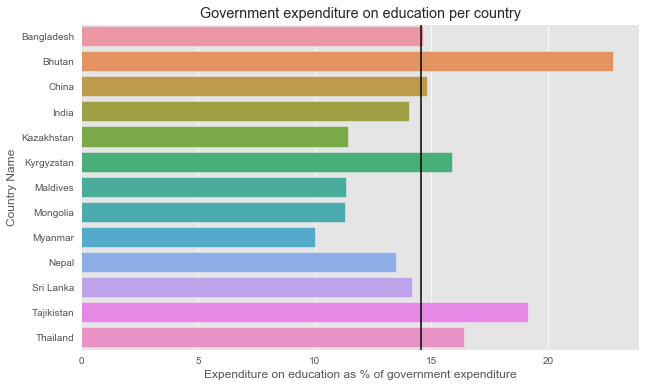

In [62]:
#Comparing govrn exp on enducation per country

expenditure = literacy_df.loc[:,'Government expenditure on education, total (% of government expenditure)'].mean()

plt.subplots(figsize=(10, 6))
barplot1 = sns.barplot(x='Government expenditure on education, total (% of government expenditure)', y='Country Name', data = literacy_df)
barplot1.set_xlabel('Expenditure on education as % of government expenditure')
barplot1.set_title('Government expenditure on education per country')
plt.axvline(x=expenditure, color = "k")


plt.savefig("Government expenditure on education per country.png")

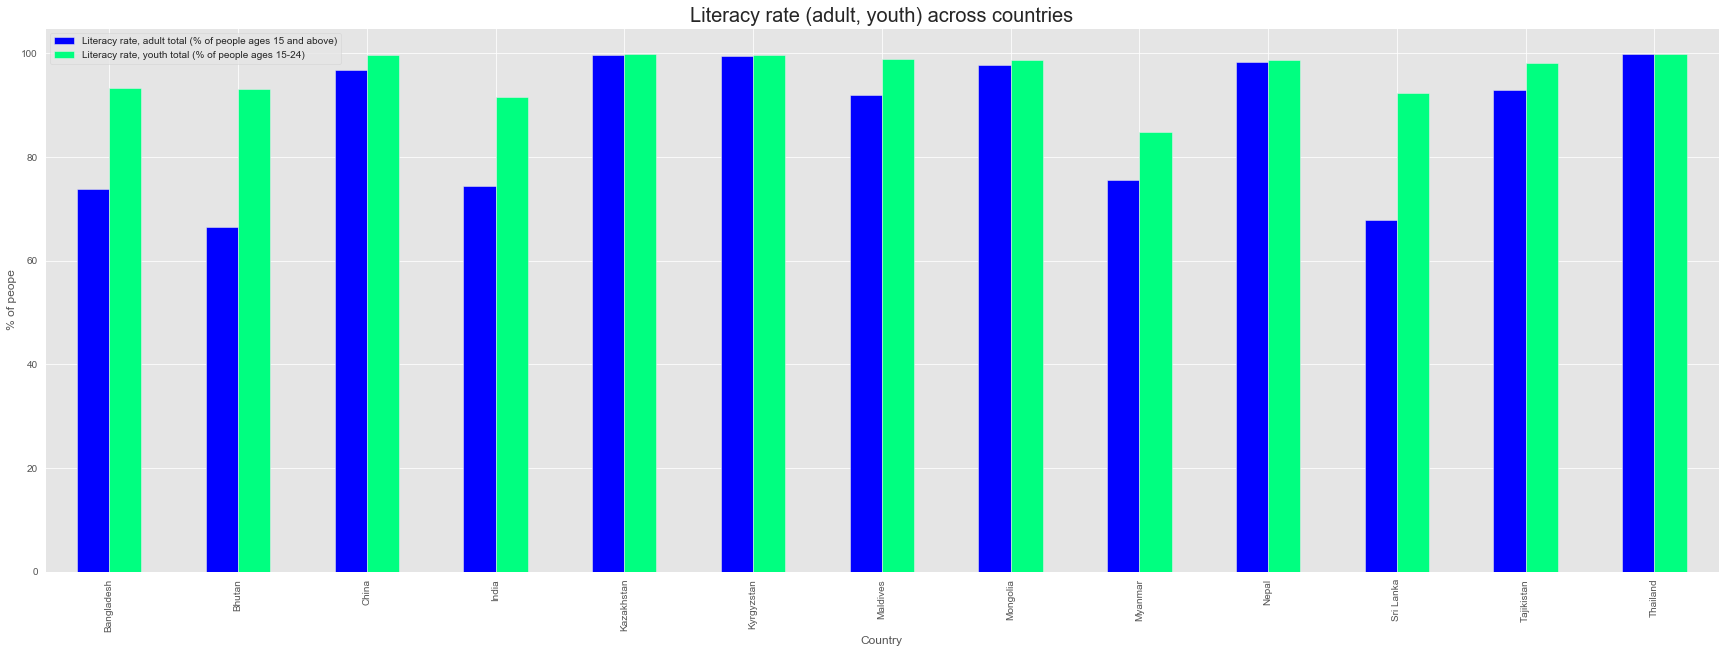

In [63]:
# Bar plot for literacy rate - adult vs youth
# In all countries - youth more educated than adults 

literacy_df.plot(x="Country Name", y=["Literacy rate, adult total (% of people ages 15 and above)", "Literacy rate, youth total (% of people ages 15-24)"], kind='bar', colormap = 'winter', figsize=(30,10))
plt.xlabel('Country')
plt.ylabel('% of peope')
plt.title('Literacy rate (adult, youth) across countries',fontsize=20)
plt.savefig('Literacy rate adult youth',
            dpi = 200,
            bbox_inches = 'tight',
            quality = 95
           )

Text(0.5, 1.0, 'Literacy rate (adult female, male) across countries')

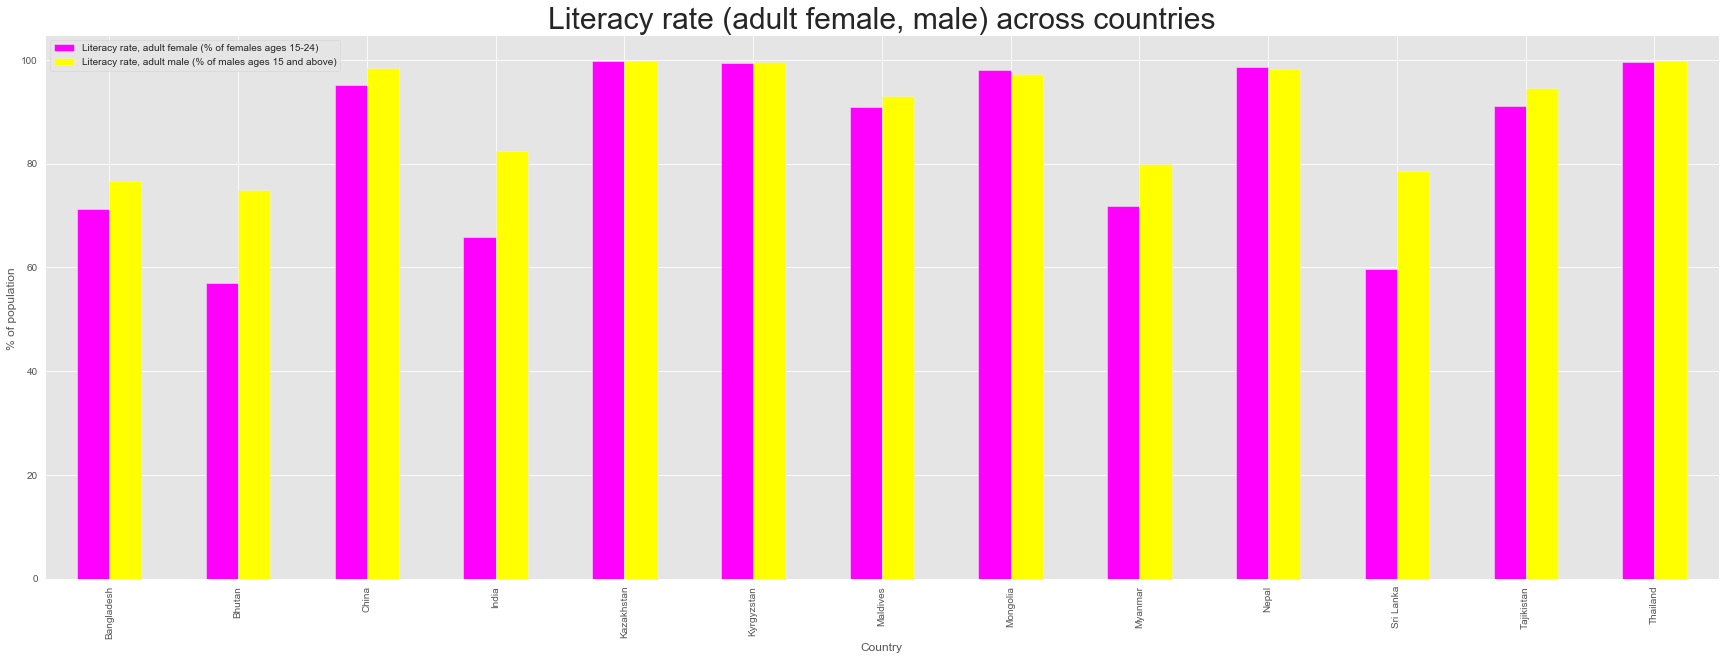

In [64]:
# Adult female vs adult male - all countries male is more
literacy_df.plot(x="Country Name", y=["Literacy rate, adult female (% of females ages 15-24)", "Literacy rate, adult male (% of males ages 15 and above)"], kind='bar', colormap = 'spring', figsize=(30,10))
plt.xlabel('Country')
plt.ylabel('% of population ')
plt.title('Literacy rate (adult female, male) across countries',fontsize=30)

Text(0.5, 1.0, 'Literacy rate (adult female, male) across countries')

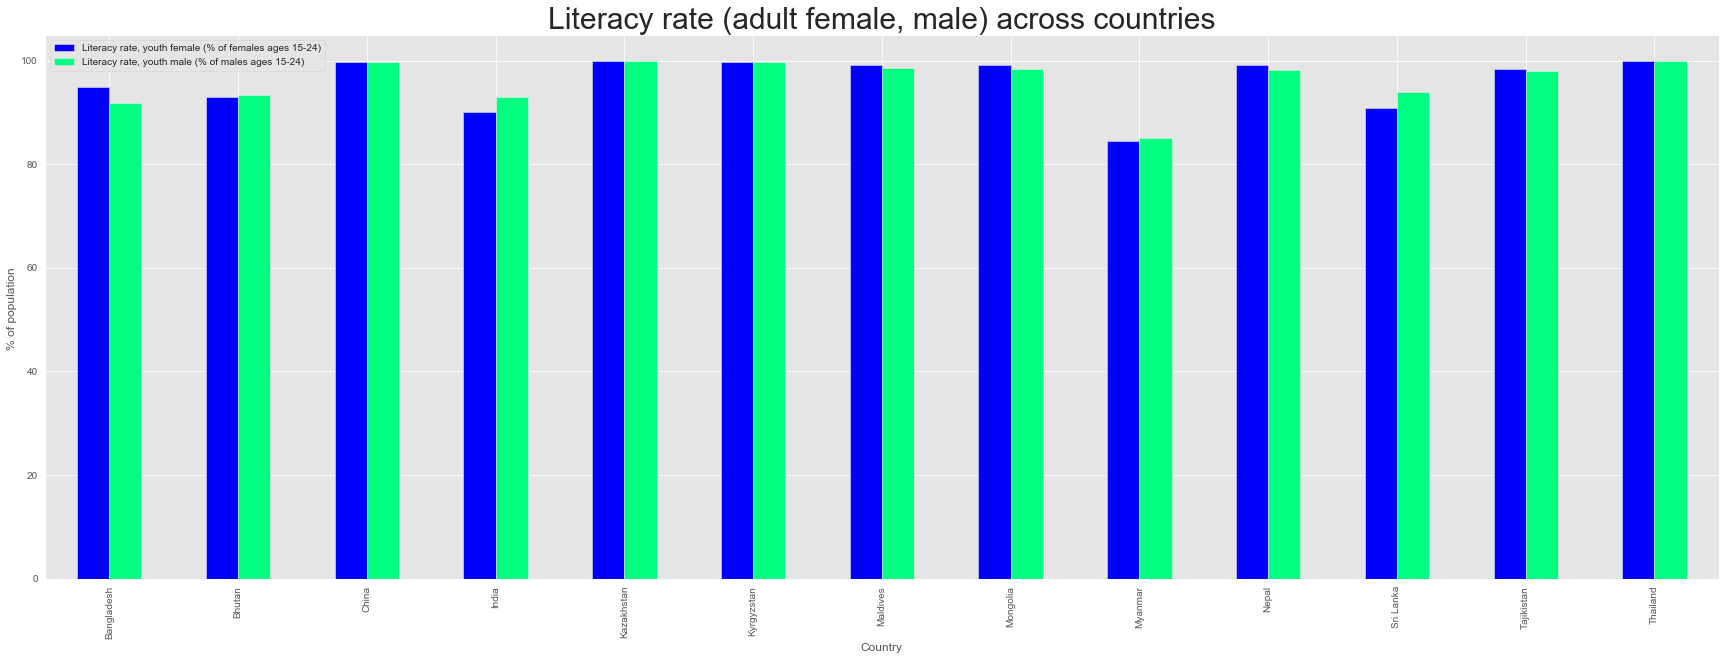

In [65]:
# Youth female vs adult male - much smaller differnce between male and female amoung the youth
literacy_df.plot(x="Country Name", y=["Literacy rate, youth female (% of females ages 15-24)", "Literacy rate, youth male (% of males ages 15-24)"], kind='bar', colormap = 'winter', figsize=(30,10))
plt.xlabel('Country')
plt.ylabel('% of population ')
plt.title('Literacy rate (adult female, male) across countries',fontsize=30)

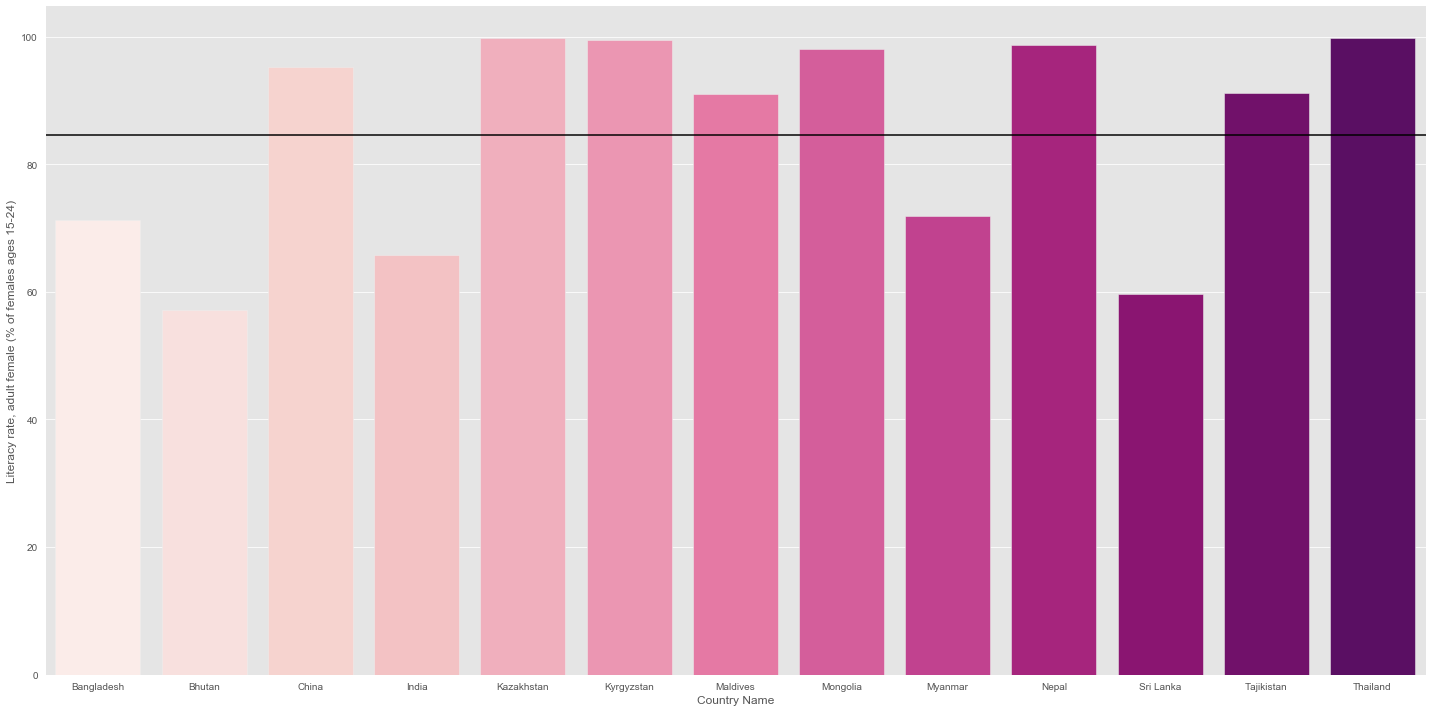

In [66]:
# Comparaison of uneducated women among adults
adult_female = literacy_df.loc[:,'Literacy rate, adult female (% of females ages 15-24)'].mean()
sns.catplot(x="Country Name", y="Literacy rate, adult female (% of females ages 15-24)", kind="bar", data=literacy_df, palette = "RdPu", height = 10, aspect = 2)

plt.axhline(y=adult_female, color = "k")

In [67]:
# Correlation of adult women literacy and rural population 
# Creating new data frame from c_asia - taking the variables related to agriculture and rural population

list4 = []
for u in list(c_asia.columns.values):
    if u == 'Country Code' or "Agriculture" in u or "agriculture" in u or "Rural" in u or u == 'Population, female' or u == 'GDP growth (annual %)' or u=='GDP (current US$)':
        list4.append(u)

# Creating data frame from health columns
fem_rural = c_asia.loc[:, list4].round(2)

fem_rural

,Country Code,"Agriculture, forestry, and fishing, value added (% of GDP)",Employment in agriculture (% of total employment) (modeled ILO estimate),GDP (current US$),GDP growth (annual %),"Population, female",Rural population (% of total population)
15,BGD,13.41,40.60,2.497239e+11,7.28,78809034.0,64.14
22,BTN,17.37,57.21,2.528008e+09,4.63,351066.0,59.83
40,CHN,7.57,26.98,1.214349e+13,6.76,674707818.0,42.04
89,IND,15.62,44.52,2.652551e+12,7.17,642787641.0,66.40
100,KAZ,4.36,15.13,1.628869e+11,4.10,9296108.0,42.66
107,KGZ,12.51,26.65,7.702935e+09,4.70,3131308.0,63.86
122,MDV,5.63,9.11,4.865546e+09,6.91,189427.0,60.62
132,MNG,10.35,28.78,1.143364e+10,5.30,1576723.0,31.64
136,MMR,23.33,50.58,6.671908e+10,6.76,27654949.0,69.68
140,NPL,26.24,70.44,2.488027e+10,7.91,15074691.0,80.66


In [68]:
# Transforming DataFrame to list
list_lit1 = literacy_df.loc[:,'Literacy rate, adult female (% of females ages 15-24)'].values.tolist()
list_lit2 = literacy_df.loc[:,'Literacy rate, adult total (% of people ages 15 and above)'].values.tolist()
list_lit3 = literacy_df.loc[:,'Literacy rate, youth total (% of people ages 15-24)'].values.tolist()

# Adding female literacy rate to new data frame
fem_rural['Literacy rate, adult female (% of females ages 15-24)'] = list_lit1
fem_rural['Literacy rate, adult total (% of people ages 15 and above)'] = list_lit2
fem_rural['Literacy rate, youth total (% of people ages 15-24)'] = list_lit3

# Run correlations
fem_rural_corr = fem_rural.corr().round(2)
fem_rural_corr

,"Agriculture, forestry, and fishing, value added (% of GDP)",Employment in agriculture (% of total employment) (modeled ILO estimate),GDP (current US$),GDP growth (annual %),"Population, female",Rural population (% of total population),"Literacy rate, adult female (% of females ages 15-24)","Literacy rate, adult total (% of people ages 15 and above)","Literacy rate, youth total (% of people ages 15-24)"
"Agriculture, forestry, and fishing, value added (% of GDP)",1.00,0.93,-0.24,0.57,-0.11,0.58,-0.20,-0.22,-0.44
Employment in agriculture (% of total employment) (modeled ILO estimate),0.93,1.00,-0.15,0.46,-0.02,0.51,-0.30,-0.30,-0.39
GDP (current US$),-0.24,-0.15,1.00,0.21,0.83,-0.35,0.12,0.16,0.18
GDP growth (annual %),0.57,0.46,0.21,1.00,0.32,0.28,0.05,0.03,-0.13
"Population, female",-0.11,-0.02,0.83,0.32,1.00,-0.19,-0.11,-0.07,-0.05
Rural population (% of total population),0.58,0.51,-0.35,0.28,-0.19,1.00,-0.45,-0.46,-0.45
"Literacy rate, adult female (% of females ages 15-24)",-0.20,-0.30,0.12,0.05,-0.11,-0.45,1.00,1.00,0.81
"Literacy rate, adult total (% of people ages 15 and above)",-0.22,-0.30,0.16,0.03,-0.07,-0.46,1.00,1.00,0.83
"Literacy rate, youth total (% of people ages 15-24)",-0.44,-0.39,0.18,-0.13,-0.05,-0.45,0.81,0.83,1.00


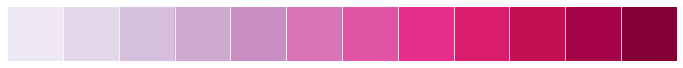

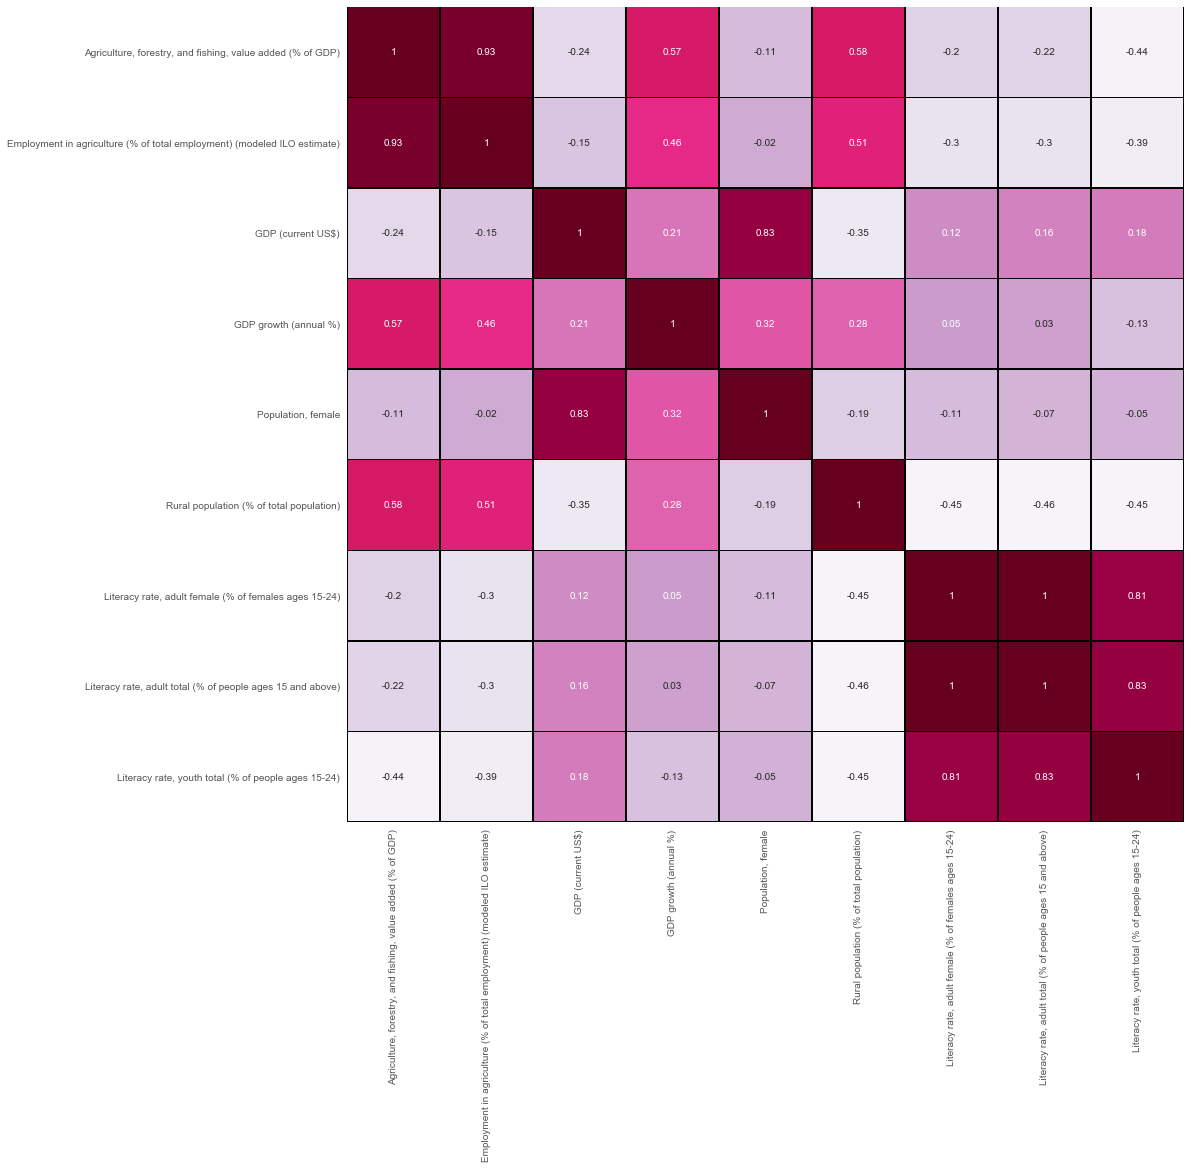

In [69]:
# Using palplot to view a color scheme
sns.palplot(sns.color_palette('PuRd', 12))


# specifying plot size
fig, ax = plt.subplots(figsize=(15,15))


# creating a heatmap
sns.heatmap(fem_rural_corr,
            cmap = 'PuRd',
            square = False,
            annot = True,
            linecolor = 'black',
            linewidths = 0.5,
            cbar = False)

# reconfiguring the plot
bottom, top = plt.ylim() # discover the values for bottom and top
bottom += 0.5            # add 0.5 to the bottom
top -= 0.5               # subtract 0.5 from the top
plt.ylim(bottom, top)    # update the ylim(bottom, top) values

# saving the figure and displaying the plot
plt.savefig('Female Literacy Corr.png')
plt.show()


In [70]:
# Male / Female Population vs GDP - almost the same strong correlation

pop_gdp = c_asia.loc [:, ("GDP (current US$)", "Population, female", "Population, male")]
pop_gdp_corr = pop_gdp.corr().round(2)
pop_gdp_corr

,GDP (current US$),"Population, female","Population, male"
GDP (current US$),1.00,0.83,0.82
"Population, female",0.83,1.00,1.00
"Population, male",0.82,1.00,1.00


In [71]:
###################################################################################################################
# ECONOMIC GROWTH #
###################################################################################################################

central_asia = world_bank[world_bank['Cool Name'] == 'Dinobots' ]

central_asia = central_asia.set_index('Country Code', drop = False)



In [72]:
#Creating a DataFrame:

main_variables = central_asia.loc[:,['Country Name',
                    'GDP (current US$)', 'GDP growth (annual %)', 'Urban population (% of total population)',
                   'Urban population growth (annual %)','Population, total',
                   'GINI index (World Bank estimate)', 'Tax revenue (% of GDP)', 
                   'Employment in agriculture (% of total employment) (modeled ILO estimate)',
                   'Employment in industry (% of total employment) (modeled ILO estimate)',
                   'Employment in services (% of total employment) (modeled ILO estimate)',
                   'Industry (including construction), value added (% of GDP)','Services, value added (% of GDP)']]


#Adding a column for GDP per capita
main_variables["GDP per capita"] = main_variables["GDP (current US$)"]/main_variables["Population, total"]

main_variables['Country_Name'] = main_variables['Country Name']


#Adding a column for air pollution
#Info taken from: http://aqicn.org/map/asia/

#air_pollution_rate = ['BGD':142, 'BTN':238]

#main_variables['Air Pollution rate'] = main_variables[air_pollution_rate]

main_variables

,Country Name,GDP (current US$),GDP growth (annual %),Urban population (% of total population),Urban population growth (annual %),"Population, total",GINI index (World Bank estimate),Tax revenue (% of GDP),Employment in agriculture (% of total employment) (modeled ILO estimate),Employment in industry (% of total employment) (modeled ILO estimate),Employment in services (% of total employment) (modeled ILO estimate),"Industry (including construction), value added (% of GDP)","Services, value added (% of GDP)",GDP per capita,Country_Name
Country Code,,,,,,,,,,,,,,,
BGD,Bangladesh,2.497239e+11,7.284184,35.858,3.255244,1.596706e+08,NaN,NaN,40.597000,20.419001,38.983002,27.750900,53.476211,1563.994082,Bangladesh
BTN,Bhutan,2.528008e+09,4.629101,40.167,3.052062,7.455680e+05,37.4,12.030195,57.207001,9.755000,33.039001,40.567894,37.152890,3390.714075,Bhutan
CHN,China,1.214349e+13,6.757008,57.960,2.693540,1.386395e+09,NaN,NaN,26.980000,28.979000,44.041000,40.541085,51.892765,8759.041578,China
IND,India,2.652551e+12,7.167889,33.600,2.314448,1.338659e+09,NaN,11.182079,44.521999,24.473000,31.004999,26.498175,48.451018,1981.499045,India
KAZ,Kazakhstan,1.628869e+11,4.100000,57.336,1.486030,1.803778e+07,27.5,10.550894,15.131000,21.283001,63.587002,32.221617,57.424244,9030.318806,Kazakhstan
KGZ,Kyrgyzstan,7.702935e+09,4.700000,36.135,2.463664,6.198200e+06,27.3,17.046285,26.646000,22.129000,51.224998,27.308093,49.932447,1242.769643,Kyrgyzstan
MDV,Maldives,4.865546e+09,6.911694,39.380,5.386972,4.964020e+05,NaN,NaN,9.109000,18.667000,72.224998,12.825458,67.369350,9801.624542,Maldives
MNG,Mongolia,1.143364e+10,5.301668,68.363,1.957855,3.113779e+06,NaN,13.602846,28.783001,19.219999,51.998001,38.268901,42.279852,3671.948419,Mongolia
MMR,Myanmar,6.671908e+10,6.758629,30.322,1.428614,5.338258e+07,NaN,6.017069,50.583000,15.943000,33.474998,36.294528,40.370732,1249.828757,Myanmar


In [73]:
#Calculating FDI Growth (2014-2017)

#Reading the excel file
FDI = pd.read_excel('FDI_WB.xlsx')

#Getting the data from central asia
FDI_central_asia = FDI[FDI['Region'] == 'central asia']

#Setting the index as country code
FDI_central_asia = FDI_central_asia.set_index('Country Code', drop = False)

#Getting the growth from 2014 - 2017
FDI_growth = ((FDI_central_asia['2017']-FDI_central_asia['2014'])/FDI_central_asia['2014'])*102

#Printing 
print(FDI_growth)

Country Code
BGD    -29.275902
BTN   -173.743718
CHN    -38.811931
IND     15.898699
KAZ    -36.225369
KGZ   -133.881529
LKA     54.684433
MDV     48.760211
MMR     85.698609
MNG    349.267190
NPL    556.450285
THA     62.938030
TJK    -43.963498
dtype: float64


In [74]:
#Calculating Air Pollution Growth (2014-2017)

air_pollution = pd.read_excel('Air Pollution WB.xlsx')

airp_central_asia = air_pollution[air_pollution['Region'] == 'central asia']

#Setting the index as country code
airp_central_asia = airp_central_asia.set_index('Country Code', drop = False)

#Getting the growth from 2014 - 2017
airp_growth = ((airp_central_asia['2017']-airp_central_asia['2014'])/airp_central_asia['2014'])*100

print(airp_growth)

Country Code
BGD   -11.038162
BTN    -7.133188
CHN   -11.884030
IND     1.395665
KAZ     0.542081
KGZ    -2.405438
LKA   -58.772390
MDV   -21.422847
MMR   -11.743948
MNG     2.080942
NPL     1.649432
THA   -10.583867
TJK    -0.707052
dtype: float64


In [75]:
#Calculating Empl.Agriculture Growth (2014-2017)

emp_agr = pd.read_excel('Employment in Agriculture WB.xlsx')

emp_agr_central_asia = emp_agr[emp_agr['Region'] == 'central asia']

#Setting the index as country code
emp_agr_central_asia = emp_agr_central_asia.set_index('Country Code', drop = False)

#Getting the growth from 2014 - 2017
emp_agr_growth = ((emp_agr_central_asia['2017']-emp_agr_central_asia['2014'])/emp_agr_central_asia['2014'])*100

print(emp_agr_growth)

Country Code
BGD    -8.340295
BTN     0.983229
CHN    -8.542374
IND    -3.364298
KAZ   -30.899210
KGZ   -15.650523
LKA    -8.486292
MDV   -11.382431
MMR    -3.160778
MNG     2.888295
NPL    -1.261620
THA    -7.545079
TJK    -1.430053
dtype: float64


In [ ]:
#Calculating Empl.Industry Growth (2014-2017)

emp_ind = pd.read_excel('Employment in Industry WB.xlsx')

emp_ind_central_asia = emp_ind[emp_ind['Region'] == 'central asia']

#Setting the index as country code
emp_ind_central_asia = emp_ind_central_asia.set_index('Country Code', drop = False)

#Getting the growth from 2014 - 2017
emp_ind_growth = ((emp_ind_central_asia['2017']-emp_ind_central_asia['2014'])/emp_ind_central_asia['2014'])*100

print(emp_ind_growth)

In [ ]:
#Calculating Empl.Services Growth (2014-2017)

emp_ser = pd.read_excel('Employment in Services WB.xlsx')

emp_ser_central_asia = emp_ser[emp_ser['Region'] == 'central asia']

#Setting the index as country code
emp_ser_central_asia = emp_ser_central_asia.set_index('Country Code', drop = False)

#Getting the growth from 2014 - 2017
emp_ser_growth = ((emp_ser_central_asia['2017']-emp_ser_central_asia['2014'])/emp_ser_central_asia['2014'])*100

print(emp_ser_growth)

In [ ]:
#Calculating Gini Growth (2011-2017)

gini = pd.read_excel('Gini Index WB.xlsx')

gini_central_asia = gini[gini['Region'] == 'central asia']

#Setting the index as country code
gini_central_asia = gini_central_asia.set_index('Country Code', drop = False)

#Getting the growth from 2014 - 2017
gini_growth = ((gini_central_asia['2017']-gini_central_asia['2011'])/gini_central_asia['2011'])*100

print(gini_growth)

In [ ]:
#Calculating Tax Revenue Growth (2014-2016)

tax = pd.read_excel('Tax Revenue WB.xlsx')

tax_central_asia = tax[tax['Region'] == 'central asia']

#Setting the index as country code
tax_central_asia = tax_central_asia.set_index('Country Code', drop = False)

#Getting the growth from 2014 - 2017
tax_growth = ((tax_central_asia['2016']-tax_central_asia['2014'])/tax_central_asia['2014'])*100

print(tax_growth)

In [ ]:
#Calculating Unemployemnt Growth (2014-2017)

unempl = pd.read_excel('Employment in Services WB.xlsx')

unempl_central_asia = unempl[unempl['Region'] == 'central asia']

#Setting the index as country code
unempl_central_asia = unempl_central_asia.set_index('Country Code', drop = False)

#Getting the growth from 2014 - 2017
unempl_growth = ((unempl_central_asia['2017']-unempl_central_asia['2014'])/unempl_central_asia['2014'])*100

print(unempl_growth)

In [ ]:
#Creating a datarame from the differente growth dataframes:

growth_df = main_variables.loc[:,['Country_Name','GDP growth (annual %)']]

#reindexing to fit the data with the other dataframes
growth_df = growth_df.reindex(['BGD', 'BTN', 'CHN', 'IND', 'KAZ', 'KGZ', 'LKA', 'MDV', 'MMR',
                              'MNG', 'NPL', 'THA', 'TJK'])

#Adding the growth dataframes to growth.df
growth_df['FDI Growth'] = pd.Series(FDI_growth)

growth_df['Unemployment Growth'] = pd.Series(unempl_growth)

growth_df['Employment in Agriculture Growth'] = pd.Series(emp_agr_growth)

growth_df['Employment in Industry Growth'] = pd.Series(emp_ind_growth)

growth_df['Employment in Services Growth'] = pd.Series(emp_ser_growth)

growth_df['Air Pollution Growth'] = pd.Series(airp_growth)

growth_df['Tax Revenue Growth'] = pd.Series(tax_growth)

growth_df['Gini Growth'] = pd.Series(gini_growth)

#Saving the dataframe to an excel
growth_df.to_excel('growth_df.xlsx',index=False)

growth_df


In [ ]:
#Creating a correlation DataFrame
df_corr_growth = growth_df.corr().round(2)

sns.heatmap(data=df_corr_growth,
           cmap = 'Blues',
           square = True,
           annot = False,
           linecolor = 'black',
           linewidths = 0.5)

In [ ]:
#Dividing the countries in three groups by GDP for analysis

#Dataframe for countries with GDP over $400B:
HighGDP = growth_df.loc[['CHN', 'IND', 'THA'],:]

#Dataframe for countries 400 < GDP < 50:
MidGDP = growth_df.loc[['BGD', 'KAZ', 'MMR', 'LKA'],:]

#Dataframe for countries with GDP under 50:
LowGDP = growth_df.loc[['BTN', 'KGZ', 'MDV', 'MNG', 'NPL', 'TJK'],:]

In [ ]:
# Displaying groups 
HighGDP

In [ ]:
# Displaying groups 
MidGDP

In [ ]:
# Displaying groups 
LowGDP

In [ ]:
#Checking the types of the dataframe
LowGDP.info(verbose= True)

In [ ]:
#Loading the excel with growth dataframe, and giving a new name 
general_metrics = pd.read_excel('growth_df.xlsx')

#Creating a dataframe for low GDP countries
LowGDP_GM = general_metrics[general_metrics['Grouping'] == 'LowGDP' ]

LowGDP_GM

In [ ]:
#Creating a boxplot for FDI growth
plt.subplots(figsize=(10,8))
sns.set(style="whitegrid")
boxplot_FDI = sns.boxplot(x="FDI_growth", y="Grouping", data=general_metrics, palette = "hls")

#Writing a title
plt.title('FDI Growth from 2014 to 2017')

#Saving the boxplot
plt.savefig('FDI Growth by Grouping.png')

In [ ]:
#Creating a barplot for Air Pollution growth by country
plt.subplots(figsize=(12,7))

barplot_airp_country = sns.barplot(x="Air_pollution_growth", y="Country_Name", data=general_metrics)

#Writing a title
plt.title('Air Pollution Growth from 2014 to 2017')

#Saving the boxplot
plt.savefig('Air Pollution Growth by Country.png')

In [ ]:
#Creating a barplot for Air Pollution growth by group
plt.subplots(figsize=(12,7))
ax = sns.barplot(x="Air_pollution_growth", y="Grouping", data=general_metrics)

#Writing a title
plt.title('Air Pollution Growth from 2014 to 2017 by Groups')

#Saving the boxplot
plt.savefig('Air Pollution Growth by Grouping.png')